![bookstore](assets/bookstore.jpg)


Identifying popular products is incredibly important for e-commerce companies! Popular products generate more revenue and, therefore, play a key role in stock control.

You've been asked to support an online bookstore by building a model to predict whether a book will be popular or not. They've supplied you with an extensive dataset containing information about all books they've sold, including:

* `price`
* `popularity` (target variable)
* `review/summary`
* `review/text`
* `review/helpfulness`
* `authors`
* `categories`

You'll need to build a model that predicts whether a book will be rated as popular or not.

They have high expectations of you, so have set a target of at least 70% accuracy! You are free to use as many features as you like, and will need to engineer new features to achieve this level of performance.

In [3]:
!pip install pandas

In [1]:
# Import some required packages
import pandas as pd

# Read in the dataset
books = pd.read_csv("data/books.csv")

# Preview the first five rows
books.head()

print('today is', datetime.now())


NameError: name 'datetime' is not defined

In [5]:
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15719 entries, 0 to 15718
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               15719 non-null  object 
 1   price               15719 non-null  float64
 2   review/helpfulness  15719 non-null  object 
 3   review/summary      15718 non-null  object 
 4   review/text         15719 non-null  object 
 5   description         15719 non-null  object 
 6   authors             15719 non-null  object 
 7   categories          15719 non-null  object 
 8   popularity          15719 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [6]:
books.describe()


,price
count,15719.000000
mean,15.862783
std,8.464523
min,1.000000
25%,10.190000
50%,13.570000
75%,19.950000
max,41.770000


In [7]:
books.isnull().sum()


title                 0
price                 0
review/helpfulness    0
review/summary        1
review/text           0
description           0
authors               0
categories            0
popularity            0
dtype: int64

In [8]:
books[books['review/summary'].isnull()]


,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity
12118,"Eldest (Inheritance, Book 2)",33.97,0/0,NaN,This book was outstanding! The best part was t...,"After successfully evading an Urgals ambush, E...",'Christopher Paolini','Juvenile Fiction',Popular


In [9]:
books.duplicated().sum()


np.int64(3294)

In [10]:
#check the value counts of the target variable
books['review/helpfulness'].value_counts()


review/helpfulness
0/0        3973
1/1        1492
2/2         784
0/1         556
3/3         518
           ... 
11/38         1
14/56         1
57/61         1
10/181        1
206/206       1
Name: count, Length: 1018, dtype: int64

In [11]:
#check all the values in the review/helpfulness column are "number/number"

books[books['review/helpfulness'].str.contains('/')]

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular
...,...,...,...,...,...,...,...,...,...
15714,Attack of the Deranged Mutant Killer Monster S...,7.64,0/0,Great for Calvin lovers,"Bought as a Christmas gift, great book for kin...",Online: gocomics.com/calvinandhobbes/,'Bill Watterson','Comics & Graphic Novels',Unpopular
15715,Book Savvy,33.99,2/2,literary pleasure,I thoroughly enjoyed Ms. Katona's Book Savvy. ...,"Recounts the adventures of Mibs Beaumont, whos...",'Ingrid Law','Juvenile Fiction',Popular
15716,Organizing to Win: New Research on Union Strat...,24.95,3/4,Great Book for Union Organizers!,This is a good reference tool for Union Organi...,As the American labour movement mobilizes for ...,"'Kate Bronfenbrenner', 'Sheldon Friedman', 'Ri...",'Business & Economics',Popular
15717,The Dharma Bums,39.95,3/3,"The Sad, Beautiful, Joyful World of Jack Kerouac",Jack Kerouac was intensely alive and his fiery...,THE DHARMA BUMS appeared just one year after t...,'Jack Kerouac','Fiction',Popular


In [12]:
books['total_reviews'] = books['review/helpfulness'].str.split('/').str[1].astype(int)
books['helpful_reviews'] = books['review/helpfulness'].str.split('/').str[0].astype(int)
books.head()

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular,3,2
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular,0,0
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular,19,17
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,1,0
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular,20,18


In [13]:
books['percentage_helpful'] = books['helpful_reviews'] / books['total_reviews']
books.head()
books['percentage_helpful'].value_counts()



percentage_helpful
1.000000    4338
0.000000     993
0.500000     748
0.666667     536
0.750000     367
            ... 
0.754386       1
0.904000       1
0.267606       1
0.296296       1
0.956113       1
Name: count, Length: 639, dtype: int64

In [14]:
books[books['percentage_helpful'].isna()] #3973

books[(books['percentage_helpful'].isna()) & (books['total_reviews'] == 0)].count() #3973

books[(books['percentage_helpful'].isna()) & (books['total_reviews'] == 0) & (books['helpful_reviews'] == 0)].count() #3973

title                 3973
price                 3973
review/helpfulness    3973
review/summary        3972
review/text           3973
description           3973
authors               3973
categories            3973
popularity            3973
total_reviews         3973
helpful_reviews       3973
percentage_helpful       0
dtype: int64

In [15]:
#replace nan with 0 
books['percentage_helpful'].fillna(0, inplace=True)

books['percentage_helpful'].isna().sum() #0

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_80105/1006356880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['percentage_helpful'].fillna(0, inplace=True)


np.int64(0)

In [16]:
print(books['categories'].value_counts())

categories
'Fiction'                      3520
'Religion'                     1053
'Biography & Autobiography'     852
'Juvenile Fiction'              815
'History'                       754
                               ... 
'Sunflowers'                      1
'Self-confidence'                 1
'United States'                   1
'Note-taking'                     1
'Asthma'                          1
Name: count, Length: 313, dtype: int64


In [17]:
# Get categories that appear only once
categories_with_count_1 = books['categories'].value_counts()[books['categories'].value_counts() == 1].index

# Select books that have categories with count 1
books_with_unique_categories = books[books['categories'].isin(categories_with_count_1)]

print(f"Number of books with unique categories: {len(books_with_unique_categories)}")
books_with_unique_categories[books_with_unique_categories['popularity'] == 'Popular']


Number of books with unique categories: 118


,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful
7256,The Everyman Anthology of Poetry for Children ...,15.95,5/5,fantastic,For anyone who loves poems. For children and a...,"Gillian Avery, historian of children's books a...",'Gillian Avery',"""Children's poetry""",Popular,5,5,1.000000
7413,The Tails Tales of Mr. Murphy,17.50,1/1,"""Go Ask Mom"" takes me back",I've been a long-time fan of Justin Matott's b...,The life and times of Mr. Murphy and Jerry the...,'Justin Matott (Jr)','Dogs',Popular,1,1,1.000000
7562,The Rune of Zachary Zimbalist (Connedim) (Conn...,14.99,3/3,Awesome book,The Rune of Zachary Zimbalist was awesome. I l...,Twelve-year-old Zachary is whisked off to the ...,'Pamela Keyes','Bullies',Popular,3,3,1.000000
7603,Becoming a Chef,19.77,1/5,Becoming a Chef,This was gifted to a high school student who w...,"""What an extraordinary book! Pain, gain, joy, ...","'Andrew Dornenburg', 'Karen Page'",'Cookery',Popular,5,1,0.200000
7724,When Smart People Fail: Rebuilding Yourself fo...,17.00,0/0,An Excellent Book for People Struggling With A...,"Dear Friends:This is an excellent, well-writte...",Offering sound advice on everything from grapp...,"'Carole Hyatt', 'Linda Gottlieb'",'Attitude (Psychology)',Popular,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
15147,Diabetes: An Emotional Journey,9.95,2/2,Wonderful!,This beautiful handmade book is a captivating ...,The book cover is made with hand made paper. T...,'Renea Jo Zosel','Diabetes',Popular,2,2,1.000000
15150,DK First Encyclopedia,11.55,0/0,Excellent,A very good book. Extremely satisfied with the...,A first encyclopedia for children aged five an...,"'Anita Ganeri', 'Chris Oxlade'","""Children's encyclopedias and dictionaries""",Popular,0,0,0.000000
15300,Henri Cartier-Bresson: Propos de Paris,25.64,6/9,Great!,this book should get five stars for the photo ...,'À Propos de Paris' presents the photographer'...,"'Henri Cartier-Bresson', 'Vera Feyder', 'André...",'Paris',Popular,9,6,0.666667
15423,Audie Murphy: Now Showing,30.00,0/0,Review of Audie Murphy: Now Showing,It was a birthday gift for a friend of mine. H...,"To celebrate the career of Audie Murphy, this ...",'Sue Gossett',"'Film posters, American'",Popular,0,0,0.000000


In [18]:
books['authors'].value_counts()

authors
'Charles Dickens'                                                                                        109
'Christopher Paolini'                                                                                     90
'Thomas Harris'                                                                                           85
'Charlotte Brontë', 'Marc Cactus'                                                                         70
'Charlotte Brontë'                                                                                        51
                                                                                                        ... 
'Gilbert Morris'                                                                                           1
'John Hick'                                                                                                1
'Ira Flatow'                                                                                               1
'Sam Deep',

In [19]:
books[books['authors'].str.contains(',')]
#create new column author_1, author_2, author_3, author_4, author_5, author_count
books['author_count'] = books['authors'].str.split("', '").str.len()
books.head()
books['author_count'].value_counts()

# author_count
# 1     12960
# 2      2168
# 3       443
# 4        93
# 5        35
# 6         9
# 11        4
# 8         4
# 7         2
# 12        1
# Name: count, dtype: int64




author_count
1     13087
2      2091
3       405
4        89
5        30
6        10
11        3
7         2
12        1
8         1
Name: count, dtype: int64

In [20]:
books[books['title'] == "Dinosaurs"]

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count
469,Dinosaurs,9.95,0/0,Dinosaurs!,Really bright and fun book design contrasts wi...,A comprehensive encyclopedia of dinosaur scien...,"'Thomas R. Holtz, Jr.'",'Juvenile Nonfiction',Unpopular,0,0,0.0,1


In [21]:
books[books['author_count'] > 3][['popularity']].value_counts()

popularity
Unpopular     85
Popular       51
Name: count, dtype: int64

In [22]:
#remove books with author_count > 3
books = books[books['author_count'] <= 3]
books['author_count'].value_counts()

books['authors'].value_counts()



authors
'Charles Dickens'                                         109
'Christopher Paolini'                                      90
'Thomas Harris'                                            85
'Charlotte Brontë', 'Marc Cactus'                          70
'Charlotte Brontë'                                         51
                                                         ... 
'Gilbert Morris'                                            1
'John Hick'                                                 1
'Ira Flatow'                                                1
'Sam Deep', 'Lyle Sussman'                                  1
'Wayne Barber', 'Eddie Rasnake', 'Richard L. Shepherd'      1
Name: count, Length: 6369, dtype: int64

In [23]:
# author_1 author_2 author_3
books['author_1'] = books['authors'].str.split("', '").str[0]
books['author_2'] = books['authors'].str.split("', '").str[1]
books['author_3'] = books['authors'].str.split("', '").str[2]
books.head()







,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular,3,2,0.666667,1,'Elizabeth Norman',NaN,NaN
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular,0,0,0.000000,1,'Yong-gi Cho',NaN,NaN
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular,19,17,0.894737,1,'Muata Ashby',NaN,NaN
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,1,0,0.000000,1,'Lynden Harris',NaN,NaN
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular,20,18,0.900000,2,'Harvey Seymour Gross,Robert McDowell',NaN


In [24]:
books['author_1'].value_counts()

author_1
'Charles Dickens'        109
'Christopher Paolini'     90
'Thomas Harris'           85
'Charlotte Brontë         75
'Charlotte Brontë'        51
                        ... 
'Chuck D. Pierce           1
'Rohit Chandra'            1
'Gilbert Morris'           1
'John Hick'                1
'Wayne Barber              1
Name: count, Length: 6354, dtype: int64

In [25]:
books['author_2'].value_counts()

author_2
Marc Cactus'                  70
Larry Sloman'                 18
William E. Butterworth IV'    18
Jeannie Hayden'               16
Donald Brownlee'              15
                              ..
Steven D. Farmer, Ph.D.'       1
Jean Kerr Stenmark'            1
Paul Sarknas'                  1
Rebecca Wagner Sytsema'        1
Eddie Rasnake                  1
Name: count, Length: 1243, dtype: int64

In [26]:

#list books where author_2 is "Jr.'
books[books['author_2'].str.contains("Jr", na=False)]

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3
3172,Flash 8: Projects for Learning Animation and I...,23.2,11/28,"Good Content, Poor Layout",'Flash 8: Projects for Learning Animation and ...,Macromedia Flash is fast becoming the Web's mo...,"'Rich Shupe', 'Robert Hoekman, Jr.'",'Computers',Unpopular,28,11,0.392857,2,'Rich Shupe,"Robert Hoekman, Jr.'",NaN
3754,The American Holistic Medical Association Guid...,7.0,0/0,Good overview of Holistic Health,This book has a good overview of Holistic Heal...,Offers information on such holistic medical pr...,"'Lawrence Trivieri', 'Larry Trivieri, Jr.', 'T...",'Health & Fitness',Unpopular,0,0,0.000000,3,'Lawrence Trivieri,"Larry Trivieri, Jr.",The American Holistic Medical Association'
8988,"The Undiscovered Paul Robeson , An Artist's Jo...",6.0,7/8,Rick's Review,I found The Undiscovered Paul Robeson is educa...,"A biography of Paul Robeson, who overcame raci...","'Paul Robeson', 'Robeson, Jr. (Paul)'",'Biography & Autobiography',Popular,8,7,0.875000,2,'Paul Robeson,"Robeson, Jr. (Paul)'",NaN


In [27]:
books['author_2'].fillna('no_author_2', inplace=True)

In [28]:
books['author_2'].isna().sum()

np.int64(0)

In [29]:
books['author_3'].value_counts()

author_3
Amanda Vick Lethco'     10
Ed McGuinness'           7
David Wall'              6
Mark C. Ebner'           6
Clayton D. Block'        5
                        ..
Cheryl A. Pientka'       1
John Hornecker'          1
Maurice Sendak'          1
J. Patrick Kociolek'     1
Richard L. Shepherd'     1
Name: count, Length: 222, dtype: int64

In [30]:
books['author_3'].isna().sum()

np.int64(15178)

In [31]:
books['author_3'].fillna('no_author_3', inplace=True)

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_80105/860416092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['author_3'].fillna('no_author_3', inplace=True)


In [32]:
books['author_3'].isna().sum()

np.int64(0)

In [33]:
books['title'].value_counts()


title
Eldest (Inheritance, Book 2)                                                                                                       90
Hannibal                                                                                                                           85
Jane Eyre (Large Print)                                                                                                            70
A Tale of Two Cities - Literary Touchstone Edition                                                                                 55
Jane Eyre (New Windmill)                                                                                                           51
                                                                                                                                   ..
The Exiles: Chantel (The Creoles, Book 1)                                                                                           1
The Metaphor of God Incarnate                           

In [34]:
books[books['title'] == 'Hannibal']['authors'].value_counts()





authors
'Thomas Harris'    85
Name: count, dtype: int64

In [35]:
books

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular,3,2,0.666667,1,'Elizabeth Norman',no_author_2,no_author_3
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular,0,0,0.000000,1,'Yong-gi Cho',no_author_2,no_author_3
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular,19,17,0.894737,1,'Muata Ashby',no_author_2,no_author_3
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,1,0,0.000000,1,'Lynden Harris',no_author_2,no_author_3
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular,20,18,0.900000,2,'Harvey Seymour Gross,Robert McDowell',no_author_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15713,"Incidents in the Life of a Slave Girl, by Harr...",31.63,5/5,Another of the most important books you'll eve...,Jacobs was a slave-- and endured unbearable ha...,"'The degradations, the wrongs, the vices, that...",'Harriet Jacobs','Biography & Autobiography',Popular,5,5,1.000000,1,'Harriet Jacobs',no_author_2,no_author_3
15714,Attack of the Deranged Mutant Killer Monster S...,7.64,0/0,Great for Calvin lovers,"Bought as a Christmas gift, great book for kin...",Online: gocomics.com/calvinandhobbes/,'Bill Watterson','Comics & Graphic Novels',Unpopular,0,0,0.000000,1,'Bill Watterson',no_author_2,no_author_3
15715,Book Savvy,33.99,2/2,literary pleasure,I thoroughly enjoyed Ms. Katona's Book Savvy. ...,"Recounts the adventures of Mibs Beaumont, whos...",'Ingrid Law','Juvenile Fiction',Popular,2,2,1.000000,1,'Ingrid Law',no_author_2,no_author_3
15717,The Dharma Bums,39.95,3/3,"The Sad, Beautiful, Joyful World of Jack Kerouac",Jack Kerouac was intensely alive and his fiery...,THE DHARMA BUMS appeared just one year after t...,'Jack Kerouac','Fiction',Popular,3,3,1.000000,1,'Jack Kerouac',no_author_2,no_author_3


In [36]:
#remove ' in author_1, author_2, author_3
books['author_1'] = books['author_1'].str.replace("'", "")
books['author_2'] = books['author_2'].str.replace("'", "")
books['author_3'] = books['author_3'].str.replace("'", "")

books.head()


,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular,3,2,0.666667,1,Elizabeth Norman,no_author_2,no_author_3
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular,0,0,0.000000,1,Yong-gi Cho,no_author_2,no_author_3
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular,19,17,0.894737,1,Muata Ashby,no_author_2,no_author_3
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,1,0,0.000000,1,Lynden Harris,no_author_2,no_author_3
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular,20,18,0.900000,2,Harvey Seymour Gross,Robert McDowell,no_author_3


# text analysis

In [37]:
#!pip install transformers
#!pip install tensorflow
!pip install torch torchvision torchaudio


In [38]:
books[books['review/summary'].isna()]

#convert review/summary to string
books['review/summary'] = books['review/summary'].astype(str)

books[books['review/summary'].isna()]



,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3


In [39]:
from transformers import pipeline

# This will now default to PyTorch
classifier = pipeline("sentiment-analysis", framework="pt")

result = classifier("The movie was absolutely fantastic!")
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


[{'label': 'POSITIVE', 'score': 0.9997510313987732}]


In [40]:
import torch
print(torch.backends.mps.is_available())  # shou

True


In [41]:
classifier = pipeline("sentiment-analysis", framework="pt", device=0)  # use GPU if available

results = classifier(list_of_reviews, batch_size=32)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


NameError: name 'list_of_reviews' is not defined

In [ ]:
import pandas as pd
from transformers import pipeline

# Create pipeline (device=0 = GPU/MPS, device=-1 = CPU)
classifier = pipeline("sentiment-analysis", 
                      framework="pt", 
                      device=0,   
                      truncation=True,     # cut long texts to 512 tokens
                      padding=True         # pad shorter texts for batching
                      )

# Convert reviews to list
reviews = books["review/text"].tolist()

# Run batched inference
results = classifier(reviews, batch_size=32)

# Convert results back into DataFrame columns
books["sentiment_text"] = [r["label"] for r in results]
books["score_text"] = [r["score"] for r in results]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [ ]:
# Sentiment pipeline (PyTorch)
classifier = pipeline("sentiment-analysis", framework="pt")

books['sentiment'] = books['review/summary'].apply(lambda x: classifier(x)[0]['label'])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [ ]:
books.head()

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3,sentiment
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular,3,2,0.666667,1,Elizabeth Norman,no_author_2,no_author_3,POSITIVE
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular,0,0,0.000000,1,Yong-gi Cho,no_author_2,no_author_3,POSITIVE
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular,19,17,0.894737,1,Muata Ashby,no_author_2,no_author_3,NEGATIVE
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,1,0,0.000000,1,Lynden Harris,no_author_2,no_author_3,NEGATIVE
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular,20,18,0.900000,2,Harvey Seymour Gross,Robert McDowell,no_author_3,POSITIVE


In [ ]:
#remane sentiment for sentiment_summary
books.rename(columns={'sentiment': 'sentiment_summary'}, inplace=True)
books.head()

books['sentiment_summary'].value_counts()



sentiment_summary
POSITIVE    11139
NEGATIVE     4444
Name: count, dtype: int64

In [ ]:
books.head()

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3,sentiment_summary,sentiment_text,score_text
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular,3,2,0.666667,1,Elizabeth Norman,no_author_2,no_author_3,POSITIVE,POSITIVE,0.999283
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular,0,0,0.000000,1,Yong-gi Cho,no_author_2,no_author_3,POSITIVE,POSITIVE,0.999845
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular,19,17,0.894737,1,Muata Ashby,no_author_2,no_author_3,NEGATIVE,NEGATIVE,0.828281
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,1,0,0.000000,1,Lynden Harris,no_author_2,no_author_3,NEGATIVE,POSITIVE,0.995394
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular,20,18,0.900000,2,Harvey Seymour Gross,Robert McDowell,no_author_3,POSITIVE,POSITIVE,0.995729


In [52]:
#SAVE FILE
books.to_csv("data/books_with_sentiment.csv", index=False)

In [ ]:
books[books['sentiment_summary'] != books['sentiment_text']]

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3,sentiment_summary,sentiment_text,score_text
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,1,0,0.000000,1,Lynden Harris,no_author_2,no_author_3,NEGATIVE,POSITIVE,0.995394
13,1491: New Revelations of the Americas Before C...,24.15,0/3,Some interesting hypotheses,I really looked forward to reading this book a...,Hoe de wereld zich ontwikkelde na de ontdekkin...,'Charles C. Mann','History',Unpopular,3,0,0.000000,1,Charles C. Mann,no_author_2,no_author_3,NEGATIVE,POSITIVE,0.940203
15,"Will You Please Be Quiet, Please?: Stories",10.20,21/21,"assortment of harsh, condensed, short stories",There is something very satisfying about short...,"With this, his first collection of stories, Ra...",'Raymond Carver','Fiction',Unpopular,21,21,1.000000,1,Raymond Carver,no_author_2,no_author_3,NEGATIVE,POSITIVE,0.997320
16,Origins of the Civil Rights Movements,18.95,2/3,One Quibble,"When Professor Morris wrote this book, he did ...",A blending of scholarly research and interview...,'Aldon D. Morris','History',Unpopular,3,2,0.666667,1,Aldon D. Morris,no_author_2,no_author_3,POSITIVE,NEGATIVE,0.996330
19,Power Plays : Win or Lose--How History's Great...,6.40,3/5,A limited analysis of political leaders,Morris is an intelligent and astute political ...,Dick Morris is the frankest and most outspoken...,'Dick Morris','Political Science',Unpopular,5,3,0.600000,1,Dick Morris,no_author_2,no_author_3,POSITIVE,NEGATIVE,0.999309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15700,"Altered Lives, Enduring Community: Japanese Am...",24.95,3/4,The Past is not Just the Past,I grew up in Seattle hearing bits and pieces o...,"Altered Lives, Enduring Community examines the...","'Stephen S. Fugita', 'Marilyn Fernandez'",'Social Science',Popular,4,3,0.750000,2,Stephen S. Fugita,Marilyn Fernandez,no_author_3,NEGATIVE,POSITIVE,0.987894
15702,Dressing Smart in the New Millennium,15.95,3/6,"Dressing Smart is fun, easy, and above all *us...",After reading this book and using some of the ...,One of America's leading image consultants out...,'JoAnna Nicholson','Business & Economics',Popular,6,3,0.500000,1,JoAnna Nicholson,no_author_2,no_author_3,POSITIVE,NEGATIVE,0.993793
15707,The Passion of the Western Mind: Understanding...,12.89,172/215,"This author, and I, live in different twentiet...",This book starts well. I found the introductio...,"""[This] magnificent critical survey, with its ...",'Richard Tarnas','Philosophy',Unpopular,215,172,0.800000,1,Richard Tarnas,no_author_2,no_author_3,POSITIVE,NEGATIVE,0.942799
15711,The A-List: A Novel,8.47,1/1,"Get on ""The A-List""",What would you do to be on The A-List?Welcome ...,"The List is an irreverent, sophisticated take ...",'Tara Ison','Fiction',Unpopular,1,1,1.000000,1,Tara Ison,no_author_2,no_author_3,POSITIVE,NEGATIVE,0.973067


In [54]:
books.head()

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3,sentiment_summary,sentiment_text,score_text
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular,3,2,0.666667,1,Elizabeth Norman,no_author_2,no_author_3,POSITIVE,POSITIVE,0.999283
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular,0,0,0.000000,1,Yong-gi Cho,no_author_2,no_author_3,POSITIVE,POSITIVE,0.999845
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular,19,17,0.894737,1,Muata Ashby,no_author_2,no_author_3,NEGATIVE,NEGATIVE,0.828281
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,1,0,0.000000,1,Lynden Harris,no_author_2,no_author_3,NEGATIVE,POSITIVE,0.995394
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular,20,18,0.900000,2,Harvey Seymour Gross,Robert McDowell,no_author_3,POSITIVE,POSITIVE,0.995729


In [57]:
books['clean_categories'] = books['categories'].str.replace("'", "")
books['clean_categories'].value_counts()

clean_categories
Fiction                      3511
Religion                     1049
Biography & Autobiography     850
Juvenile Fiction              814
History                       753
                             ... 
Sunflowers                      1
Self-confidence                 1
United States                   1
Note-taking                     1
Asthma                          1
Name: count, Length: 312, dtype: int64

In [59]:
!pip install scikit-learn

     |████████████████████████████████| 11.1 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 5.4 MB/s eta 0:00:011
     |████████████████████████████████| 308 kB 30.8 MB/s eta 0:00:01
You should consider upgrading via the '/Users/sol/Code/datascience/good-books/venv/bin/python3 -m pip install --upgrade pip' command.


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(books['description'])


In [62]:
!pip install sentence-transformers

     |████████████████████████████████| 483 kB 4.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/sol/Code/datascience/good-books/venv/bin/python3 -m pip install --upgrade pip' command.


In [1]:
!pip install pandas scikit-learn numpy transformers sentence-transformers



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import numpy as np

# Example DataFrame
books_test = pd.DataFrame({
    "title": ["Book A", "Book B"],
    "description": [
        "An amazing adventure full of friendship and courage.",
        "A dark horror story that will terrify you."
    ]
})

# -------------------------------
# 1️⃣ TF-IDF features
# -------------------------------
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(books_test['description'])

# Convert sparse TF-IDF to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# -------------------------------
# 2️⃣ Sentence embeddings
# -------------------------------
embed_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embed_model.encode(books_test['description'].tolist())
embeddings_df = pd.DataFrame(embeddings, columns=[f"emb_{i}" for i in range(embeddings.shape[1])])

# -------------------------------
# 3️⃣ Sentiment analysis
# -------------------------------
sentiment_model = pipeline("sentiment-analysis", framework="pt", device=0)
sentiments = sentiment_model(books_test['description'].tolist(), batch_size=16)

books_test['sentiment_label'] = [s['label'] for s in sentiments]
books_test['sentiment_score'] = [s['score'] for s in sentiments]

# Encode sentiment_label as numeric
books_test['sentiment_label_num'] = books_test['sentiment_label'].map({"NEGATIVE":0, "POSITIVE":1})

# -------------------------------
# 4️⃣ Metadata / numeric features
# -------------------------------
books_test['description_num_words'] = books_test['description'].apply(lambda x: len(x.split()))
books_test['_description_num_chars'] = books_test['description'].apply(len)
books_test['description_avg_word_len'] = books_test['description'].apply(lambda x: sum(len(w) for w in x.split()) / max(len(x.split()),1))

metadata_df = books_test[['sentiment_score','sentiment_label_num','description_num_words','_description_num_chars','description_avg_word_len']]

# -------------------------------
# 5️⃣ Optional keyword flags
# -------------------------------
keywords = ['mystery', 'romance', 'adventure', 'horror']
for kw in keywords:
    books_test[f'has_{kw}'] = books_test['description'].str.contains(kw, case=False).astype(int)

keywords_df = books_test[[f'has_{kw}' for kw in keywords]]

# -------------------------------
# Combine all features
# -------------------------------
feature_matrix = pd.concat([tfidf_df, embeddings_df, metadata_df, keywords_df], axis=1)

print(feature_matrix.shape)
print(feature_matrix.head())


/Users/sol/Code/datascience/good-books/books/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


(2, 421)
   adventure  adventure full   amazing  amazing adventure        an  \
0   0.258199        0.258199  0.258199           0.258199  0.258199   
1   0.000000        0.000000  0.000000           0.000000  0.000000   

   an amazing       and  and courage   courage     dark  ...   emb_383  \
0    0.258199  0.258199     0.258199  0.258199  0.00000  ... -0.047822   
1    0.000000  0.000000     0.000000  0.000000  0.27735  ...  0.064876   

   sentiment_score  sentiment_label_num  num_words  num_chars  avg_word_len  \
0         0.999882                    1          8         52         5.625   
1         0.999766                    1          8         42         4.375   

   has_mystery  has_romance  has_adventure  has_horror  
0            0            0              1           0  
1            0            0              0           1  

[2 rows x 421 columns]


In [2]:
!pip uninstall tensorflow keras -y



Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0
Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0


In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install --upgrade transformers sentence-transformers


Looking in indexes: https://download.pytorch.org/whl/cpu
You should consider upgrading via the '/Users/sol/Code/datascience/good-books/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sol/Code/datascience/good-books/venv/bin/python3 -m pip install --upgrade pip' command.


In [58]:
books.columns


Index(['title', 'price', 'review/helpfulness', 'review/summary', 'review/text',
       'description', 'authors', 'categories', 'popularity', 'total_reviews',
       'helpful_reviews', 'percentage_helpful', 'author_count', 'author_1',
       'author_2', 'author_3', 'sentiment_summary', 'sentiment_text',
       'score_text', 'clean_categories'],
      dtype='object')

In [2]:
import pandas as pd 
books_w = pd.read_csv("data/books_with_sentiment.csv")
books_w.head()

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3,sentiment_summary,sentiment_text,score_text
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular,3,2,0.666667,1,Elizabeth Norman,no_author_2,no_author_3,POSITIVE,POSITIVE,0.999283
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular,0,0,0.000000,1,Yong-gi Cho,no_author_2,no_author_3,POSITIVE,POSITIVE,0.999845
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular,19,17,0.894737,1,Muata Ashby,no_author_2,no_author_3,NEGATIVE,NEGATIVE,0.828281
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,1,0,0.000000,1,Lynden Harris,no_author_2,no_author_3,NEGATIVE,POSITIVE,0.995394
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular,20,18,0.900000,2,Harvey Seymour Gross,Robert McDowell,no_author_3,POSITIVE,POSITIVE,0.995729


In [5]:
books_w['clean_categories'] = books_w['categories'].str.replace("'", "")

In [6]:
books_w.columns

Index(['title', 'price', 'review/helpfulness', 'review/summary', 'review/text',
       'description', 'authors', 'categories', 'popularity', 'total_reviews',
       'helpful_reviews', 'percentage_helpful', 'author_count', 'author_1',
       'author_2', 'author_3', 'sentiment_summary', 'sentiment_text',
       'score_text', 'clean_categories'],
      dtype='object')

In [ ]:
filter_columns = ['title', 'price', 'review/helpfulness', 'review/summary', 'review/text',
       'description', 'authors', 'categories', 'popularity', 'total_reviews',
       'helpful_reviews', 'percentage_helpful', 'author_count', 'author_1',
       'author_2', 'author_3', 'sentiment_summary', 'sentiment_text',
       'score_text', 'clean_categories']

In [8]:
books_sample = books_w.head(20)

In [9]:
books_sample

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3,sentiment_summary,sentiment_text,score_text,clean_categories
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular,3,2,0.666667,1,Elizabeth Norman,no_author_2,no_author_3,POSITIVE,POSITIVE,0.999283,History
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular,0,0,0.000000,1,Yong-gi Cho,no_author_2,no_author_3,POSITIVE,POSITIVE,0.999845,Religion
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular,19,17,0.894737,1,Muata Ashby,no_author_2,no_author_3,NEGATIVE,NEGATIVE,0.828281,"Body, Mind & Spirit"
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,1,0,0.000000,1,Lynden Harris,no_author_2,no_author_3,NEGATIVE,POSITIVE,0.995394,Social Science
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular,20,18,0.900000,2,Harvey Seymour Gross,Robert McDowell,no_author_3,POSITIVE,POSITIVE,0.995729,Poetry
5,For Women Only: What You Need to Know about th...,10.98,9/12,This is not a male bashing book!,We all know that men and women are wired diffe...,What bestselling author Feldhahn's research re...,'Shaunti Feldhahn','Religion',Unpopular,12,9,0.750000,1,Shaunti Feldhahn,no_author_2,no_author_3,POSITIVE,POSITIVE,0.991373,Religion
6,Scar Tissue,10.98,0/0,Tedious,I must admit that I have not finished reading ...,"In this ""vivid and inspiring"" NYT bestseller (...","'Anthony Kiedis', 'Larry Sloman'",'Music',Unpopular,0,0,0.000000,2,Anthony Kiedis,Larry Sloman,no_author_3,NEGATIVE,NEGATIVE,0.578432,Music
7,"Dereliction of Duty: Johnson, McNamara, the Jo...",11.55,3/4,Good but dense,I used this book in a course on the Vietnam Wa...,"""The war in Vietnam was not lost in the field,...",'H. R. McMaster','History',Unpopular,4,3,0.750000,1,H. R. McMaster,no_author_2,no_author_3,POSITIVE,POSITIVE,0.997806,History
8,Epiphany at Goofy's Gas,9.95,0/7,"Keeler, trying hard",Greg Keeler wants to have his poems mean somet...,Greg Keeler has gradually gained a larger audi...,'Greg Keeler','Poetry',Unpopular,7,0,0.000000,1,Greg Keeler,no_author_2,no_author_3,NEGATIVE,NEGATIVE,0.986693,Poetry
9,Virginia Woolf,12.95,6/6,Another excellent addition to a wonderful seri...,I've become quite enchanted with the Overlook ...,Traces the life of the British novelist and di...,'Hermione Lee','Biography & Autobiography',Unpopular,6,6,1.000000,1,Hermione Lee,no_author_2,no_author_3,POSITIVE,POSITIVE,0.994241,Biography & Autobiography


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import numpy as np


books_test = books_w


# -------------------------------
# 1️⃣ TF-IDF features
# -------------------------------
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(books_test['description'])

# Convert sparse TF-IDF to DataFrame
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# -------------------------------
# 2️⃣ Sentence embeddings
# -------------------------------
embed_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embed_model.encode(books_test['description'].tolist())
embeddings_df = pd.DataFrame(
    embeddings, columns=[f"emb_{i}" for i in range(embeddings.shape[1])])

# -------------------------------
# 3️⃣ Sentiment analysis
# -------------------------------
sentiment_model = pipeline(
    "sentiment-analysis", framework="pt", device=0, truncation=True, padding=True)
sentiments = sentiment_model(books_test['description'].tolist(), batch_size=16)

books_test['sentiment_label'] = [s['label'] for s in sentiments]
books_test['sentiment_score'] = [s['score'] for s in sentiments]

# Encode sentiment_label as numeric
books_test['sentiment_label_num'] = books_test['sentiment_label'].map(
    {"NEGATIVE": 0, "POSITIVE": 1})

# -------------------------------
# 4️⃣ Metadata / numeric features
# -------------------------------
books_test['num_words'] = books_test['description'].apply(
    lambda x: len(x.split()))
books_test['num_chars'] = books_test['description'].apply(len)
books_test['avg_word_len'] = books_test['description'].apply(
    lambda x: sum(len(w) for w in x.split()) / max(len(x.split()), 1))

metadata_df = books_test[[
    'sentiment_score', 'sentiment_label_num', 'num_words', 'num_chars', 'avg_word_len']]

# -------------------------------
# 5️⃣ Optional keyword flags
# -------------------------------
keywords = [
    'mystery', 'romance', 'adventure', 'horror', 'queer', 'thriller', 'fantasy',
    'science fiction', 'sci-fi', 'dystopian', 'historical', 'young adult', 'children',
    'non-fiction', 'biography', 'memoir', 'self-help', 'psychology', 'philosophy',
    'crime', 'detective', 'paranormal', 'supernatural', 'magic', 'mythology',
    'fairy tale', 'classic', 'drama', 'suspense', 'war', 'political', 'travel',
    'spiritual', 'religion', 'comedy', 'humor', 'family', 'friendship', 'coming-of-age',
    'teen', 'epic', 'western', 'literary', 'tragedy', 'romantic', 'love', 'school',
    'science', 'technology', 'mystical', 'dark', 'poetry', 'art', 'music', 'dance',
    'theater', 'film', 'tv', 'comics', 'anime', 'manga', 'gaming', 'hobbies', 'crafts', 'diy',
    'cooking', 'food', 'drink', 'coffee', 'tea', 'alcohol', 'smoking', 'drugs', 'sex', 'relationships',
    'dating', 'marriage', 'family', 'children', 'parenting', 'education', 'school', 'college', 'university',
    'job', 'career', 'money', 'finance', 'investing', 'economy', 'politics', 'war', 'peace', 'justice', 'crime',
    'punishment', 'crime', 'detective', 'paranormal', 'supernatural', 'magic', 'mythology', 'murder', 'violence',
]
for kw in keywords:
    books_test[f'has_{kw}'] = books_test['description'].str.contains(
        kw, case=False).astype(int)

keywords_df = books_test[[f'has_{kw}' for kw in keywords]]

# -------------------------------
# Combine all features
# -------------------------------
feature_matrix = pd.concat(
    [tfidf_df, embeddings_df, metadata_df, keywords_df], axis=1)

print(feature_matrix.shape)
print(feature_matrix.head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_86025/1967946610.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  books_test[f'has_{kw}'] = books_test['description'].str.contains(kw, case=False).astype(int)


(15583, 5491)
   000  000 first   10  100  101   11   12   13   15  150  ...  has_peace  \
0  0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0   
1  0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0   
2  0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0   
3  0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0   
4  0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0   

   has_justice  has_crime  has_punishment  has_crime  has_detective  \
0            0          0               0          0              0   
1            0          0               0          0              0   
2            0          0               0          0              0   
3            1          0               0          0              0   
4            0          0               0          0              0   

   has_paranormal  has_supernatural  has_magic  has_mythology  
0               0               

In [28]:
books_test.to_csv("data/books_test.csv", index=False)

In [33]:
books_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Columns: 117 entries, title to has_punishment
dtypes: float64(5), int64(97), object(15)
memory usage: 13.9+ MB


In [40]:
books_test.head()
books_test.columns
#list of all the columns that start with has_
has_columns = [col for col in books_test.columns if col.startswith('has_')]
print(has_columns)
# check each column to see if it has 1 values
has_columns_w_1_value = []
for col in has_columns:
    # if the values 1 have more than 20
    if books_test[col].value_counts()[0] < 15000:
        print(col)
        print(books_test[col].value_counts())
        print("\n")
        has_columns_w_1_value.append(col)
  

print(has_columns_w_1_value)


['has_mystery', 'has_romance', 'has_adventure', 'has_horror', 'has_queer', 'has_thriller', 'has_fantasy', 'has_science fiction', 'has_sci-fi', 'has_dystopian', 'has_historical', 'has_young adult', 'has_children', 'has_non-fiction', 'has_biography', 'has_memoir', 'has_self-help', 'has_psychology', 'has_philosophy', 'has_crime', 'has_detective', 'has_paranormal', 'has_supernatural', 'has_magic', 'has_mythology', 'has_fairy tale', 'has_classic', 'has_drama', 'has_suspense', 'has_war', 'has_political', 'has_travel', 'has_spiritual', 'has_religion', 'has_comedy', 'has_humor', 'has_family', 'has_friendship', 'has_coming-of-age', 'has_teen', 'has_epic', 'has_western', 'has_literary', 'has_tragedy', 'has_romantic', 'has_love', 'has_school', 'has_science', 'has_technology', 'has_mystical', 'has_dark', 'has_poetry', 'has_art', 'has_music', 'has_dance', 'has_theater', 'has_film', 'has_tv', 'has_comics', 'has_anime', 'has_manga', 'has_gaming', 'has_hobbies', 'has_crafts', 'has_diy', 'has_cooking',

In [34]:
books_test['has_justice']
books_test['has_justice'].value_counts()


has_justice
0    15331
1      252
Name: count, dtype: int64

In [75]:

# -------------------------------
# 5️⃣ Optional keyword flags
# -------------------------------
keywords = [
    'mystery', 'romance', 'adventure', 'horror', 'queer', 'thriller', 'fantasy',
    'science fiction', 'sci-fi', 'dystopian', 'historical', 'young adult', 'children',
    'non-fiction', 'biography', 'memoir', 'self-help', 'psychology', 'philosophy',
    'crime', 'detective', 'paranormal', 'supernatural', 'magic', 'mythology',
    'fairy tale', 'classic', 'drama', 'suspense', 'war', 'political', 'travel',
    'spiritual', 'religion', 'comedy', 'humor', 'family', 'friendship', 'coming-of-age',
    'teen', 'epic', 'western', 'literary', 'tragedy', 'romantic', 'love', 'school',
    'science', 'technology', 'mystical', 'dark', 'poetry', 'art', 'music', 'dance','sisters','brothers',
    'theater', 'film', 'tv', 'comics', 'anime', 'manga', 'gaming', 'hobbies', 'crafts', 'diy',
    'cooking', 'food', 'drink', 'coffee', 'tea', 'alcohol', 'smoking', 'drugs', 'sex', 'relationships',
    'dating', 'marriage', 'family', 'children', 'parenting', 'education', 'school', 'college', 'university',
    'job', 'career', 'money', 'finance', 'investing', 'economy', 'politics', 'war', 'peace', 'justice', 'crime',
    'punishment', 'crime', 'detective', 'paranormal', 'supernatural', 'magic', 'mythology', 'murder', 'violence','heartbreak', 'loss',
    'grieve', 'mission', 'adventure', 'mystery', 'romance', 'horror', 'queer', 'thriller', 'fantasy',
    'science fiction', 'sci-fi', 'dystopian', 'historical', 'young adult', 'children',
    'non-fiction', 'biography', 'memoir', 'self-help', 'psychology', 'philosophy',
    'crime', 'detective', 'paranormal', 'supernatural', 'magic', 'mythology', 'murder', 'violence',
    'history', 'food', 'drink', 'coffee', 'tea', 'alcohol', 'smoking', 'drugs', 'sex', 'relationships',
    'dating', 'marriage', 'family', 'children', 'parenting', 'education', 'school', 'college', 'university',
    'job', 'career', 'money', 'finance', 'investing', 'economy', 'politics', 'war','melodrama', 'peace', 'justice', 'crime',
    'punishment', 'crime', 'detective', 'paranormal', 'supernatural', 'magic', 'mythology', 'murder', 'violence',
    'earth', 'space', 'time', 'universe', 'galaxy', 'planet', 'moon', 'sun', 'stars', 'sky', 'clouds', 'rain', 'snow', 'wind', 'weather', 'nature', 'animals', 'plants', 'trees', 'flowers', 'colors', 'art', 'music', 'dance',
   'relationships', 'friendship', 'coming-of-age', 'teen', 'epic', 'western', 'literary', 'tragedy', 'romantic', 'love', 'school', 'victorian','binge', 'dummies','bible', 'pirate', 'monster', 'summer', 'winter'
   'autumn','workout','fetish', 'erotica','coach', 'education','drugs','prayer', 'sister', 'sucess', 'media', 'guide']
kw_set = set(keywords)
keywords = list(kw_set)
for kw in keywords:
    books_test[f'has_{kw}'] = books_test['description'].str.contains(
        kw, case=False).astype(int)

keywords_df = books_test[[f'has_{kw}' for kw in keywords]]

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_86025/321026520.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  books_test[f'has_{kw}'] = books_test['description'].str.contains(


In [65]:
total_rows = 15583
books_to_include = 500
keywords_threshold = total_rows - books_to_include

In [76]:
books_test.head()
books_test.columns
#list of all the columns that start with has_
has_columns = [col for col in books_test.columns if col.startswith('has_')]
print(books_test.shape,len(has_columns))
# check each column to see if it has 1 values
has_columns_w_1_value = []
for col in has_columns:
    # if the values 1 have more than 20
    if books_test[col].value_counts()[0] < keywords_threshold:
        print(col)
        print(books_test[col].value_counts())
        print("\n")
        has_columns_w_1_value.append(col)
  

print(has_columns_w_1_value, len(has_columns_w_1_value))


(15583, 165) 139
has_children
has_children
0    14665
1      918
Name: count, dtype: int64


has_classic
has_classic
0    14464
1     1119
Name: count, dtype: int64


has_war
has_war
0    12186
1     3397
Name: count, dtype: int64


has_spiritual
has_spiritual
0    15030
1      553
Name: count, dtype: int64


has_family
has_family
0    14267
1     1316
Name: count, dtype: int64


has_teen
has_teen
0    14634
1      949
Name: count, dtype: int64


has_love
has_love
0    13039
1     2544
Name: count, dtype: int64


has_school
has_school
0    14779
1      804
Name: count, dtype: int64


has_science
has_science
0    15022
1      561
Name: count, dtype: int64


has_art
has_art
0    10263
1     5320
Name: count, dtype: int64


has_tea
has_tea
0    13682
1     1901
Name: count, dtype: int64


has_sex
has_sex
0    15000
1      583
Name: count, dtype: int64


has_murder
has_murder
0    14892
1      691
Name: count, dtype: int64


has_history
has_history
0    14177
1     1406
Name: count, dtype:

In [53]:
books_test['has_murder']
books_test['has_murder'].value_counts()




has_murder
0    14892
1      691
Name: count, dtype: int64

In [77]:
has_columns_w_1_value

['has_children',
 'has_classic',
 'has_war',
 'has_spiritual',
 'has_family',
 'has_teen',
 'has_love',
 'has_school',
 'has_science',
 'has_art',
 'has_tea',
 'has_sex',
 'has_murder',
 'has_history',
 'has_nature',
 'has_loss',
 'has_rain',
 'has_time',
 'has_guide']

In [79]:
print(books_test.columns)

Index(['title', 'price', 'review/helpfulness', 'review/summary', 'review/text',
       'description', 'authors', 'categories', 'popularity', 'total_reviews',
       ...
       'has_erotica', 'has_workout', 'has_fetish', 'has_coach', 'has_prayer',
       'has_sucess', 'has_melodrama', 'has_sister', 'has_media', 'has_guide'],
      dtype='object', length=165)


In [101]:
# Get all columns
all_columns = books_test.columns.tolist()

# Get has_ columns
has_columns = [col for col in all_columns if col.startswith('has_')]

# Get the has_ columns you want to keep
has_columns_to_keep = has_columns_w_1_value

# Get columns that are NOT has_ columns (keep all non-has_ columns)
non_has_columns = [col for col in all_columns if not col.startswith('has_')]

# Combine: keep the useful has_ columns + all non-has_ columns
final_columns = non_has_columns + has_columns_to_keep

print(f"Total columns: {len(all_columns)}")
print(f"Has columns to keep: {len(has_columns_to_keep)}")
print(f"Non-has columns: {len(non_has_columns)}")
print(f"Final columns: {len(final_columns)}")

Total columns: 165
Has columns to keep: 19
Non-has columns: 26
Final columns: 45


In [85]:
final_columns

['has_children',
 'has_classic',
 'has_war',
 'has_spiritual',
 'has_family',
 'has_teen',
 'has_love',
 'has_school',
 'has_science',
 'has_art',
 'has_tea',
 'has_sex',
 'has_murder',
 'has_history',
 'has_nature',
 'has_loss',
 'has_rain',
 'has_time',
 'has_guide',
 'title',
 'price',
 'review/helpfulness',
 'review/summary',
 'review/text',
 'description',
 'authors',
 'categories',
 'popularity',
 'total_reviews',
 'helpful_reviews',
 'percentage_helpful',
 'author_count',
 'author_1',
 'author_2',
 'author_3',
 'sentiment_summary',
 'sentiment_text',
 'score_text',
 'clean_categories',
 'sentiment_label',
 'sentiment_score',
 'sentiment_label_num',
 'num_words',
 'num_chars',
 'avg_word_len']

In [102]:
books_model = books_test[final_columns]
books_model.head()
books_model.columns
books_model.info()
books_model.describe()



#convert nan to string bu tonly column review/text
books_model['review/summary'] = books_model['review/summary'].fillna('')
books_model.isnull().sum()
books_model.describe()
books_model.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                15583 non-null  object 
 1   price                15583 non-null  float64
 2   review/helpfulness   15583 non-null  object 
 3   review/summary       15582 non-null  object 
 4   review/text          15583 non-null  object 
 5   description          15583 non-null  object 
 6   authors              15583 non-null  object 
 7   categories           15583 non-null  object 
 8   popularity           15583 non-null  object 
 9   total_reviews        15583 non-null  int64  
 10  helpful_reviews      15583 non-null  int64  
 11  percentage_helpful   15583 non-null  float64
 12  author_count         15583 non-null  int64  
 13  author_1             15583 non-null  object 
 14  author_2             15583 non-null  object 
 15  author_3             15583 non-null 

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_86025/1486058473.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_model['review/summary'] = books_model['review/summary'].fillna('')


In [99]:
#which column has null values order by the number of null values
books_model.isnull().sum().sort_values(ascending=False)

has_children           0
review/text            0
authors                0
categories             0
popularity             0
total_reviews          0
helpful_reviews        0
percentage_helpful     0
author_count           0
author_1               0
author_2               0
author_3               0
sentiment_summary      0
sentiment_text         0
score_text             0
clean_categories       0
sentiment_label        0
sentiment_score        0
sentiment_label_num    0
num_words              0
num_chars              0
description            0
review/summary         0
has_classic            0
review/helpfulness     0
has_war                0
has_spiritual          0
has_family             0
has_teen               0
has_love               0
has_school             0
has_science            0
has_art                0
has_tea                0
has_sex                0
has_murder             0
has_history            0
has_nature             0
has_loss               0
has_rain               0


In [100]:
books_model[books_model['review/summary'].isna()]


,has_children,has_classic,has_war,has_spiritual,has_family,has_teen,has_love,has_school,has_science,has_art,...,sentiment_summary,sentiment_text,score_text,clean_categories,sentiment_label,sentiment_score,sentiment_label_num,num_words,num_chars,avg_word_len


In [104]:
non_has_columns

['title',
 'price',
 'review/helpfulness',
 'review/summary',
 'review/text',
 'description',
 'authors',
 'categories',
 'popularity',
 'total_reviews',
 'helpful_reviews',
 'percentage_helpful',
 'author_count',
 'author_1',
 'author_2',
 'author_3',
 'sentiment_summary',
 'sentiment_text',
 'score_text',
 'clean_categories',
 'sentiment_label',
 'sentiment_score',
 'sentiment_label_num',
 'num_words',
 'num_chars',
 'avg_word_len']

In [108]:
columns_to_drop = [
 'review/helpfulness',
 'review/summary',
 'review/text',
 'description',
 'authors',
 'categories']

final_books_model = books_model.drop(columns=columns_to_drop)
final_books_model.head()
final_books_model.columns
final_books_model.info()
final_books_model.describe()
final_books_model.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                15583 non-null  object 
 1   price                15583 non-null  float64
 2   popularity           15583 non-null  object 
 3   total_reviews        15583 non-null  int64  
 4   helpful_reviews      15583 non-null  int64  
 5   percentage_helpful   15583 non-null  float64
 6   author_count         15583 non-null  int64  
 7   author_1             15583 non-null  object 
 8   author_2             15583 non-null  object 
 9   author_3             15583 non-null  object 
 10  sentiment_summary    15583 non-null  object 
 11  sentiment_text       15583 non-null  object 
 12  score_text           15583 non-null  float64
 13  clean_categories     15583 non-null  object 
 14  sentiment_label      15583 non-null  object 
 15  sentiment_score      15583 non-null 

title                  0
price                  0
popularity             0
total_reviews          0
helpful_reviews        0
percentage_helpful     0
author_count           0
author_1               0
author_2               0
author_3               0
sentiment_summary      0
sentiment_text         0
score_text             0
clean_categories       0
sentiment_label        0
sentiment_score        0
sentiment_label_num    0
num_words              0
num_chars              0
avg_word_len           0
has_children           0
has_classic            0
has_war                0
has_spiritual          0
has_family             0
has_teen               0
has_love               0
has_school             0
has_science            0
has_art                0
has_tea                0
has_sex                0
has_murder             0
has_history            0
has_nature             0
has_loss               0
has_rain               0
has_time               0
has_guide              0
dtype: int64

In [109]:
final_books_model.to_csv("data/final_books_model.csv", index=False)

In [110]:
final_books_model.columns

Index(['title', 'price', 'popularity', 'total_reviews', 'helpful_reviews',
       'percentage_helpful', 'author_count', 'author_1', 'author_2',
       'author_3', 'sentiment_summary', 'sentiment_text', 'score_text',
       'clean_categories', 'sentiment_label', 'sentiment_score',
       'sentiment_label_num', 'num_words', 'num_chars', 'avg_word_len',
       'has_children', 'has_classic', 'has_war', 'has_spiritual', 'has_family',
       'has_teen', 'has_love', 'has_school', 'has_science', 'has_art',
       'has_tea', 'has_sex', 'has_murder', 'has_history', 'has_nature',
       'has_loss', 'has_rain', 'has_time', 'has_guide'],
      dtype='object')

#Models

In [168]:
books = pd.read_csv("data/final_books_model.csv")

books.isnull().sum().sort_values(ascending=False)

title                  0
has_art                0
has_war                0
has_spiritual          0
has_family             0
has_teen               0
has_love               0
has_school             0
has_science            0
has_tea                0
has_children           0
has_sex                0
has_murder             0
has_history            0
has_nature             0
has_loss               0
has_rain               0
has_time               0
has_classic            0
avg_word_len           0
price                  0
author_3               0
popularity             0
total_reviews          0
helpful_reviews        0
percentage_helpful     0
author_count           0
author_1               0
author_2               0
sentiment_summary      0
num_chars              0
sentiment_text         0
score_text             0
clean_categories       0
sentiment_label        0
sentiment_score        0
sentiment_label_num    0
num_words              0
has_guide              0
dtype: int64

In [169]:
# target to numeric
# Map to numeric
books['target'] = books['popularity'].map({
    "Unpopular": 0,
    "Popular": 1
})

In [170]:
books.head()

,title,price,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3,...,has_tea,has_sex,has_murder,has_history,has_nature,has_loss,has_rain,has_time,has_guide,target
0,We Band of Angels: The Untold Story of America...,10.88,Unpopular,3,2,0.666667,1,Elizabeth Norman,no_author_2,no_author_3,...,0,0,0,1,0,0,1,0,0,0
1,Prayer That Brings Revival: Interceding for Go...,9.35,Unpopular,0,0,0.000000,1,Yong-gi Cho,no_author_2,no_author_3,...,1,0,0,0,0,0,0,0,0,0
2,The Mystical Journey from Jesus to Christ,24.95,Unpopular,19,17,0.894737,1,Muata Ashby,no_author_2,no_author_3,...,1,0,0,0,0,0,0,0,0,0
3,Death Row,7.99,Unpopular,1,0,0.000000,1,Lynden Harris,no_author_2,no_author_3,...,0,0,0,0,0,0,0,0,0,0
4,Sound and Form in Modern Poetry: Second Editio...,32.50,Unpopular,20,18,0.900000,2,Harvey Seymour Gross,Robert McDowell,no_author_3,...,0,0,0,0,0,0,0,0,0,0


In [171]:
books.columns

Index(['title', 'price', 'popularity', 'total_reviews', 'helpful_reviews',
       'percentage_helpful', 'author_count', 'author_1', 'author_2',
       'author_3', 'sentiment_summary', 'sentiment_text', 'score_text',
       'clean_categories', 'sentiment_label', 'sentiment_score',
       'sentiment_label_num', 'num_words', 'num_chars', 'avg_word_len',
       'has_children', 'has_classic', 'has_war', 'has_spiritual', 'has_family',
       'has_teen', 'has_love', 'has_school', 'has_science', 'has_art',
       'has_tea', 'has_sex', 'has_murder', 'has_history', 'has_nature',
       'has_loss', 'has_rain', 'has_time', 'has_guide', 'target'],
      dtype='object')

In [125]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                15583 non-null  object 
 1   price                15583 non-null  float64
 2   popularity           15583 non-null  object 
 3   total_reviews        15583 non-null  int64  
 4   helpful_reviews      15583 non-null  int64  
 5   percentage_helpful   15583 non-null  float64
 6   author_count         15583 non-null  int64  
 7   author_1             15583 non-null  object 
 8   author_2             15583 non-null  object 
 9   author_3             15583 non-null  object 
 10  sentiment_summary    15583 non-null  object 
 11  sentiment_text       15583 non-null  object 
 12  score_text           15583 non-null  float64
 13  clean_categories     15583 non-null  object 
 14  sentiment_label      15583 non-null  object 
 15  sentiment_score      15583 non-null 

In [172]:
books['sentiment_label'].value_counts()

sentiment_label
POSITIVE    13482
NEGATIVE     2101
Name: count, dtype: int64

In [129]:
books[['sentiment_label','sentiment_score','sentiment_label_num']]

,sentiment_label,sentiment_score,sentiment_label_num
0,POSITIVE,0.999049,1
1,POSITIVE,0.999642,1
2,POSITIVE,0.999086,1
3,POSITIVE,0.999014,1
4,POSITIVE,0.999651,1
...,...,...,...
15578,POSITIVE,0.998983,1
15579,NEGATIVE,0.980834,0
15580,POSITIVE,0.999588,1
15581,POSITIVE,0.997873,1


In [173]:
#rename sentiment_label to sentiment_label_description
books.rename(columns={'sentiment_score': 'score_description'}, inplace=True)
books.rename(columns={'sentiment_label_num': 'sentiment_description_num'}, inplace=True)

books.columns



Index(['title', 'price', 'popularity', 'total_reviews', 'helpful_reviews',
       'percentage_helpful', 'author_count', 'author_1', 'author_2',
       'author_3', 'sentiment_summary', 'sentiment_text', 'score_text',
       'clean_categories', 'sentiment_label', 'score_description',
       'sentiment_description_num', 'num_words', 'num_chars', 'avg_word_len',
       'has_children', 'has_classic', 'has_war', 'has_spiritual', 'has_family',
       'has_teen', 'has_love', 'has_school', 'has_science', 'has_art',
       'has_tea', 'has_sex', 'has_murder', 'has_history', 'has_nature',
       'has_loss', 'has_rain', 'has_time', 'has_guide', 'target'],
      dtype='object')

In [174]:
#drop sentiment_label
books.drop(columns=['sentiment_label'], inplace=True)
books.columns



Index(['title', 'price', 'popularity', 'total_reviews', 'helpful_reviews',
       'percentage_helpful', 'author_count', 'author_1', 'author_2',
       'author_3', 'sentiment_summary', 'sentiment_text', 'score_text',
       'clean_categories', 'score_description', 'sentiment_description_num',
       'num_words', 'num_chars', 'avg_word_len', 'has_children', 'has_classic',
       'has_war', 'has_spiritual', 'has_family', 'has_teen', 'has_love',
       'has_school', 'has_science', 'has_art', 'has_tea', 'has_sex',
       'has_murder', 'has_history', 'has_nature', 'has_loss', 'has_rain',
       'has_time', 'has_guide', 'target'],
      dtype='object')

In [175]:
books[['sentiment_summary', 'sentiment_text']]

,sentiment_summary,sentiment_text
0,POSITIVE,POSITIVE
1,POSITIVE,POSITIVE
2,NEGATIVE,NEGATIVE
3,NEGATIVE,POSITIVE
4,POSITIVE,POSITIVE
...,...,...
15578,POSITIVE,POSITIVE
15579,POSITIVE,POSITIVE
15580,POSITIVE,POSITIVE
15581,POSITIVE,POSITIVE


In [176]:
books['sentiment_summary_num'] = books['sentiment_summary'].map({"NEGATIVE": 0, "POSITIVE": 1})
books['sentiment_text_num'] = books['sentiment_text'].map({"NEGATIVE": 0, "POSITIVE": 1})

In [134]:
books

,title,price,popularity,total_reviews,helpful_reviews,percentage_helpful,author_count,author_1,author_2,author_3,...,has_murder,has_history,has_nature,has_loss,has_rain,has_time,has_guide,target,sentiment_summary_num,sentiment_text_num
0,We Band of Angels: The Untold Story of America...,10.88,Unpopular,3,2,0.666667,1,Elizabeth Norman,no_author_2,no_author_3,...,0,1,0,0,1,0,0,0,1,1
1,Prayer That Brings Revival: Interceding for Go...,9.35,Unpopular,0,0,0.000000,1,Yong-gi Cho,no_author_2,no_author_3,...,0,0,0,0,0,0,0,0,1,1
2,The Mystical Journey from Jesus to Christ,24.95,Unpopular,19,17,0.894737,1,Muata Ashby,no_author_2,no_author_3,...,0,0,0,0,0,0,0,0,0,0
3,Death Row,7.99,Unpopular,1,0,0.000000,1,Lynden Harris,no_author_2,no_author_3,...,0,0,0,0,0,0,0,0,0,1
4,Sound and Form in Modern Poetry: Second Editio...,32.50,Unpopular,20,18,0.900000,2,Harvey Seymour Gross,Robert McDowell,no_author_3,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15578,"Incidents in the Life of a Slave Girl, by Harr...",31.63,Popular,5,5,1.000000,1,Harriet Jacobs,no_author_2,no_author_3,...,0,0,0,0,0,0,0,1,1,1
15579,Attack of the Deranged Mutant Killer Monster S...,7.64,Unpopular,0,0,0.000000,1,Bill Watterson,no_author_2,no_author_3,...,0,0,0,0,0,0,0,0,1,1
15580,Book Savvy,33.99,Popular,2,2,1.000000,1,Ingrid Law,no_author_2,no_author_3,...,0,0,0,0,0,0,0,1,1,1
15581,The Dharma Bums,39.95,Popular,3,3,1.000000,1,Jack Kerouac,no_author_2,no_author_3,...,0,0,0,0,0,0,0,1,1,1


In [177]:
books[['sentiment_summary', 'sentiment_summary_num','sentiment_text', 'sentiment_text_num','sentiment_text_num']]







,sentiment_summary,sentiment_summary_num,sentiment_text,sentiment_text_num,sentiment_text_num
0,POSITIVE,1,POSITIVE,1,1
1,POSITIVE,1,POSITIVE,1,1
2,NEGATIVE,0,NEGATIVE,0,0
3,NEGATIVE,0,POSITIVE,1,1
4,POSITIVE,1,POSITIVE,1,1
...,...,...,...,...,...
15578,POSITIVE,1,POSITIVE,1,1
15579,POSITIVE,1,POSITIVE,1,1
15580,POSITIVE,1,POSITIVE,1,1
15581,POSITIVE,1,POSITIVE,1,1


In [178]:
#drop colums['sentiment_summary', 'sentiment_text']
books.drop(columns=['sentiment_summary', 'sentiment_text'], inplace=True)
books.columns
books.to_csv("data/books_model.csv", index=False)






In [179]:
books = pd.read_csv("data/books_model.csv")
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      15583 non-null  object 
 1   price                      15583 non-null  float64
 2   popularity                 15583 non-null  object 
 3   total_reviews              15583 non-null  int64  
 4   helpful_reviews            15583 non-null  int64  
 5   percentage_helpful         15583 non-null  float64
 6   author_count               15583 non-null  int64  
 7   author_1                   15583 non-null  object 
 8   author_2                   15583 non-null  object 
 9   author_3                   15583 non-null  object 
 10  score_text                 15583 non-null  float64
 11  clean_categories           15583 non-null  object 
 12  score_description          15583 non-null  float64
 13  sentiment_description_num  15583 non-null  int

In [180]:
target = books['target']

In [181]:
#drop target and popularity
books.drop(columns=['target', 'popularity'], inplace=True)
books.columns


Index(['title', 'price', 'total_reviews', 'helpful_reviews',
       'percentage_helpful', 'author_count', 'author_1', 'author_2',
       'author_3', 'score_text', 'clean_categories', 'score_description',
       'sentiment_description_num', 'num_words', 'num_chars', 'avg_word_len',
       'has_children', 'has_classic', 'has_war', 'has_spiritual', 'has_family',
       'has_teen', 'has_love', 'has_school', 'has_science', 'has_art',
       'has_tea', 'has_sex', 'has_murder', 'has_history', 'has_nature',
       'has_loss', 'has_rain', 'has_time', 'has_guide',
       'sentiment_summary_num', 'sentiment_text_num'],
      dtype='object')

In [182]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      15583 non-null  object 
 1   price                      15583 non-null  float64
 2   total_reviews              15583 non-null  int64  
 3   helpful_reviews            15583 non-null  int64  
 4   percentage_helpful         15583 non-null  float64
 5   author_count               15583 non-null  int64  
 6   author_1                   15583 non-null  object 
 7   author_2                   15583 non-null  object 
 8   author_3                   15583 non-null  object 
 9   score_text                 15583 non-null  float64
 10  clean_categories           15583 non-null  object 
 11  score_description          15583 non-null  float64
 12  sentiment_description_num  15583 non-null  int64  
 13  num_words                  15583 non-null  int

In [148]:
# Count categories with less than 500 books

book_threshold = 200
categories_less_than_x = (books['clean_categories'].value_counts() < book_threshold).sum()
print(f"Categories with less than {book_threshold} books: {categories_less_than_x}")

# Count categories with more than 500 books  
categories_more_than_x= (books['clean_categories'].value_counts() > book_threshold).sum()
print(f"Categories with more than {book_threshold} books: {categories_more_than_x}")

# Show the actual breakdown
category_counts = books['clean_categories'].value_counts()
print(f"\nTotal categories: {len(category_counts)}")
print(f"Categories with < {book_threshold} books: {(category_counts < book_threshold).sum()}")
print(f"Categories with >= {book_threshold} books: {(category_counts >= book_threshold).sum()}")

Categories with less than 200 books: 293
Categories with more than 200 books: 19

Total categories: 312
Categories with < 200 books: 293
Categories with >= 200 books: 19


In [154]:
# Analyze top categories and their book counts
category_counts = books['clean_categories'].value_counts()

print("Top 20 categories by number of books:")
print("=" * 50)
for i, (category, count) in enumerate(category_counts.head(20).items(), 1):
    print(f"{i:2d}. {category:30s} - {count:4d} books")

print(f"\nTotal categories: {len(category_counts)}")
print(f"Total books: {len(books)}")

# Show categories with more than book_threshold books
print(f"\nCategories with more than {book_threshold} books:")
print("=" * 40)
top_categories = category_counts[category_counts > book_threshold]
for category, count in top_categories.items():
    print(f"{category:30s} - {count:4d} books")

print(f"\nSummary:")
print(f"Categories with > {book_threshold} books: {len(top_categories)}")
print(f"Books in top categories: {top_categories.sum()}")
print(f"Books in smaller categories: {len(books) - top_categories.sum()}")

Top 20 categories by number of books:
 1. Fiction                        - 3511 books
 2. Religion                       - 1049 books
 3. Biography & Autobiography      -  850 books
 4. Juvenile Fiction               -  814 books
 5. History                        -  753 books
 6. Business & Economics           -  690 books
 7. Family & Relationships         -  484 books
 8. Computers                      -  484 books
 9. Health & Fitness               -  407 books
10. Cooking                        -  397 books
11. Body, Mind & Spirit            -  358 books
12. Music                          -  303 books
13. Juvenile Nonfiction            -  279 books
14. Self-Help                      -  263 books
15. Political Science              -  246 books
16. Sports & Recreation            -  241 books
17. Social Science                 -  239 books
18. Education                      -  210 books
19. Psychology                     -  206 books
20. Science                        -  190 books

T

In [189]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      15583 non-null  object 
 1   price                      15583 non-null  float64
 2   total_reviews              15583 non-null  int64  
 3   helpful_reviews            15583 non-null  int64  
 4   percentage_helpful         15583 non-null  float64
 5   author_count               15583 non-null  int64  
 6   author_1                   15583 non-null  object 
 7   author_2                   15583 non-null  object 
 8   author_3                   15583 non-null  object 
 9   score_text                 15583 non-null  float64
 10  clean_categories           15583 non-null  object 
 11  score_description          15583 non-null  float64
 12  sentiment_description_num  15583 non-null  int64  
 13  num_words                  15583 non-null  int

In [183]:
#create asimplify categories with only the top 20 categories and teh rest as other
books['clean_categories'] = books['clean_categories'].apply(lambda x: 'other' if x not in top_categories.index else x)





In [185]:
books['clean_categories'].value_counts()

clean_categories
other                        3799
Fiction                      3511
Religion                     1049
Biography & Autobiography     850
Juvenile Fiction              814
History                       753
Business & Economics          690
Family & Relationships        484
Computers                     484
Health & Fitness              407
Cooking                       397
Body, Mind & Spirit           358
Music                         303
Juvenile Nonfiction           279
Self-Help                     263
Political Science             246
Sports & Recreation           241
Social Science                239
Education                     210
Psychology                    206
Name: count, dtype: int64

In [186]:
# Another way to do the same thing
books['clean_categories'] = books['clean_categories'].replace('other', 'Other')

In [187]:
books.to_csv("data/books_model.csv", index=False)

In [190]:
books.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      15583 non-null  object 
 1   price                      15583 non-null  float64
 2   total_reviews              15583 non-null  int64  
 3   helpful_reviews            15583 non-null  int64  
 4   percentage_helpful         15583 non-null  float64
 5   author_count               15583 non-null  int64  
 6   author_1                   15583 non-null  object 
 7   author_2                   15583 non-null  object 
 8   author_3                   15583 non-null  object 
 9   score_text                 15583 non-null  float64
 10  clean_categories           15583 non-null  object 
 11  score_description          15583 non-null  float64
 12  sentiment_description_num  15583 non-null  int64  
 13  num_words                  15583 non-null  int

In [191]:
# Check column types
print(books.dtypes)


title                         object
price                        float64
total_reviews                  int64
helpful_reviews                int64
percentage_helpful           float64
author_count                   int64
author_1                      object
author_2                      object
author_3                      object
score_text                   float64
clean_categories              object
score_description            float64
sentiment_description_num      int64
num_words                      int64
num_chars                      int64
avg_word_len                 float64
has_children                   int64
has_classic                    int64
has_war                        int64
has_spiritual                  int64
has_family                     int64
has_teen                       int64
has_love                       int64
has_school                     int64
has_science                    int64
has_art                        int64
has_tea                        int64
h

In [260]:
books = pd.read_csv("data/books_model.csv")
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      15583 non-null  object 
 1   price                      15583 non-null  float64
 2   total_reviews              15583 non-null  int64  
 3   helpful_reviews            15583 non-null  int64  
 4   percentage_helpful         15583 non-null  float64
 5   author_count               15583 non-null  int64  
 6   author_1                   15583 non-null  object 
 7   author_2                   15583 non-null  object 
 8   author_3                   15583 non-null  object 
 9   score_text                 15583 non-null  float64
 10  clean_categories           15583 non-null  object 
 11  score_description          15583 non-null  float64
 12  sentiment_description_num  15583 non-null  int64  
 13  num_words                  15583 non-null  int

In [261]:
# get non numeric columns
books.select_dtypes(include=['object']).columns






Index(['title', 'author_1', 'author_2', 'author_3', 'clean_categories'], dtype='object')

## Author
Frequency encoding

In [197]:
# count the number of authors
books['author_1'].value_counts()






author_1
Charlotte Brontë       126
Charles Dickens        109
Christopher Paolini     90
Thomas Harris           85
Gary Chapman            49
                      ... 
R&A                      1
Lisa Carver              1
Robert S. Chambers       1
Michael Yates            1
Wayne Barber             1
Name: count, Length: 6277, dtype: int64

In [262]:
# Count frequency of each author
top_authors = books['author_1'].value_counts().nlargest(20).index.tolist()

# Replace all authors not in top 20 with 'Other'
books['author_1_clean'] = books['author_1'].apply(lambda x: x if x in top_authors else 'Other')




In [263]:
# count the number of authors
books['author_1_clean'].value_counts()

author_1_clean
Other                        14536
Charlotte Brontë               126
Charles Dickens                109
Christopher Paolini             90
Thomas Harris                   85
Gary Chapman                    49
Julia Quinn                     47
Donald Miller                   45
Oscar Wilde                     45
Nicholas Sparks                 45
Catherine Coulter               43
Nora Roberts                    42
Kate Chopin                     42
Ashley Audrain                  38
Thomas Hardy                    38
Patricia Daniels Cornwell       36
Sherry Argov                    36
Jonah Goldberg                  35
Leo Bormans                     32
Lewis Carroll                   32
Jim Collins                     32
Name: count, dtype: int64

In [200]:
# count the number of authors
books['author_2'].value_counts()

author_2
no_author_2                  13087
Marc Cactus                     70
William E. Butterworth IV       18
Larry Sloman                    18
Jeannie Hayden                  16
                             ...  
Steven D. Farmer, Ph.D.          1
Jean Kerr Stenmark               1
Paul Sarknas                     1
Rebecca Wagner Sytsema           1
Eddie Rasnake                    1
Name: count, Length: 1239, dtype: int64

In [264]:
#dropo author_1 and author_2
books.drop(columns=['author_1', 'author_2', 'author_3'], inplace=True)
books.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      15583 non-null  object 
 1   price                      15583 non-null  float64
 2   total_reviews              15583 non-null  int64  
 3   helpful_reviews            15583 non-null  int64  
 4   percentage_helpful         15583 non-null  float64
 5   author_count               15583 non-null  int64  
 6   score_text                 15583 non-null  float64
 7   clean_categories           15583 non-null  object 
 8   score_description          15583 non-null  float64
 9   sentiment_description_num  15583 non-null  int64  
 10  num_words                  15583 non-null  int64  
 11  num_chars                  15583 non-null  int64  
 12  avg_word_len               15583 non-null  float64
 13  has_children               15583 non-null  int

### one hot encoding for author

In [265]:
# Optional: one-hot encode
books = pd.get_dummies(books, columns=['author_1_clean'], prefix='author', dtype=int)

In [ ]:
books.columns


Index(['title', 'price', 'total_reviews', 'helpful_reviews',
       'percentage_helpful', 'author_count', 'score_text', 'clean_categories',
       'score_description', 'sentiment_description_num', 'num_words',
       'num_chars', 'avg_word_len', 'has_children', 'has_classic', 'has_war',
       'has_spiritual', 'has_family', 'has_teen', 'has_love', 'has_school',
       'has_science', 'has_art', 'has_tea', 'has_sex', 'has_murder',
       'has_history', 'has_nature', 'has_loss', 'has_rain', 'has_time',
       'has_guide', 'sentiment_summary_num', 'sentiment_text_num',
       'author_Ashley Audrain', 'author_Catherine Coulter',
       'author_Charles Dickens', 'author_Charlotte Brontë',
       'author_Christopher Paolini', 'author_Donald Miller',
       'author_Gary Chapman', 'author_Jim Collins', 'author_Jonah Goldberg',
       'author_Julia Quinn', 'author_Kate Chopin', 'author_Leo Bormans',
       'author_Lewis Carroll', 'author_Nicholas Sparks', 'author_Nora Roberts',
       'author_Os

In [267]:
books.head()

,title,price,total_reviews,helpful_reviews,percentage_helpful,author_count,score_text,clean_categories,score_description,sentiment_description_num,...,author_Leo Bormans,author_Lewis Carroll,author_Nicholas Sparks,author_Nora Roberts,author_Oscar Wilde,author_Other,author_Patricia Daniels Cornwell,author_Sherry Argov,author_Thomas Hardy,author_Thomas Harris
0,We Band of Angels: The Untold Story of America...,10.88,3,2,0.666667,1,0.999283,History,0.999049,1,...,0,0,0,0,0,1,0,0,0,0
1,Prayer That Brings Revival: Interceding for Go...,9.35,0,0,0.000000,1,0.999845,Religion,0.999642,1,...,0,0,0,0,0,1,0,0,0,0
2,The Mystical Journey from Jesus to Christ,24.95,19,17,0.894737,1,0.828281,"Body, Mind & Spirit",0.999086,1,...,0,0,0,0,0,1,0,0,0,0
3,Death Row,7.99,1,0,0.000000,1,0.995394,Social Science,0.999014,1,...,0,0,0,0,0,1,0,0,0,0
4,Sound and Form in Modern Poetry: Second Editio...,32.50,20,18,0.900000,2,0.995729,Other,0.999651,1,...,0,0,0,0,0,1,0,0,0,0


## CAtergories

In [268]:
books = pd.get_dummies(books, columns=['clean_categories'], prefix='category', dtype=int)
books.columns



Index(['title', 'price', 'total_reviews', 'helpful_reviews',
       'percentage_helpful', 'author_count', 'score_text', 'score_description',
       'sentiment_description_num', 'num_words', 'num_chars', 'avg_word_len',
       'has_children', 'has_classic', 'has_war', 'has_spiritual', 'has_family',
       'has_teen', 'has_love', 'has_school', 'has_science', 'has_art',
       'has_tea', 'has_sex', 'has_murder', 'has_history', 'has_nature',
       'has_loss', 'has_rain', 'has_time', 'has_guide',
       'sentiment_summary_num', 'sentiment_text_num', 'author_Ashley Audrain',
       'author_Catherine Coulter', 'author_Charles Dickens',
       'author_Charlotte Brontë', 'author_Christopher Paolini',
       'author_Donald Miller', 'author_Gary Chapman', 'author_Jim Collins',
       'author_Jonah Goldberg', 'author_Julia Quinn', 'author_Kate Chopin',
       'author_Leo Bormans', 'author_Lewis Carroll', 'author_Nicholas Sparks',
       'author_Nora Roberts', 'author_Oscar Wilde', 'author_Other',

In [269]:
books.head()

,title,price,total_reviews,helpful_reviews,percentage_helpful,author_count,score_text,score_description,sentiment_description_num,num_words,...,category_Juvenile Fiction,category_Juvenile Nonfiction,category_Music,category_Other,category_Political Science,category_Psychology,category_Religion,category_Self-Help,category_Social Science,category_Sports & Recreation
0,We Band of Angels: The Untold Story of America...,10.88,3,2,0.666667,1,0.999283,0.999049,1,318,...,0,0,0,0,0,0,0,0,0,0
1,Prayer That Brings Revival: Interceding for Go...,9.35,0,0,0.000000,1,0.999845,0.999642,1,74,...,0,0,0,0,0,0,1,0,0,0
2,The Mystical Journey from Jesus to Christ,24.95,19,17,0.894737,1,0.828281,0.999086,1,94,...,0,0,0,0,0,0,0,0,0,0
3,Death Row,7.99,1,0,0.000000,1,0.995394,0.999014,1,142,...,0,0,0,0,0,0,0,0,1,0
4,Sound and Form in Modern Poetry: Second Editio...,32.50,20,18,0.900000,2,0.995729,0.999651,1,13,...,0,0,0,1,0,0,0,0,0,0


In [270]:
# all category_has_category_has_ columns should be renamed to category_has_
has_columns = [col for col in books.columns if col.startswith('has_')]
books.rename(columns={col: f'description_has_{col.split("has_")[1]}' for col in has_columns}, inplace=True)
books.columns



Index(['title', 'price', 'total_reviews', 'helpful_reviews',
       'percentage_helpful', 'author_count', 'score_text', 'score_description',
       'sentiment_description_num', 'num_words', 'num_chars', 'avg_word_len',
       'description_has_children', 'description_has_classic',
       'description_has_war', 'description_has_spiritual',
       'description_has_family', 'description_has_teen',
       'description_has_love', 'description_has_school',
       'description_has_science', 'description_has_art', 'description_has_tea',
       'description_has_sex', 'description_has_murder',
       'description_has_history', 'description_has_nature',
       'description_has_loss', 'description_has_rain', 'description_has_time',
       'description_has_guide', 'sentiment_summary_num', 'sentiment_text_num',
       'author_Ashley Audrain', 'author_Catherine Coulter',
       'author_Charles Dickens', 'author_Charlotte Brontë',
       'author_Christopher Paolini', 'author_Donald Miller',
       'aut

## Title

In [271]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1️⃣ TF-IDF for titles
tfidf_title = TfidfVectorizer(max_features=500, ngram_range=(1,2), stop_words='english')
X_title_tfidf = tfidf_title.fit_transform(books['title'].fillna(''))

# Convert to DataFrame
title_tfidf_df = pd.DataFrame(
    X_title_tfidf.toarray(), 
    columns=[f"title_tfidf_{i}" for i in range(X_title_tfidf.shape[1])]
)

# 2️⃣ Title length features
books['title_num_words'] = books['title'].apply(lambda x: len(str(x).split()))
books['title_num_chars'] = books['title'].apply(lambda x: len(str(x)))

title_length_df = books[['title_num_words', 'title_num_chars']]

# 3️⃣ Optional: keyword flags (example)
keywords = [
    'mystery', 'romance', 'adventure', 'horror', 'queer', 'thriller', 'fantasy',
    'science fiction', 'sci-fi', 'dystopian', 'historical', 'young adult', 'children',
    'non-fiction', 'biography', 'memoir', 'self-help', 'psychology', 'philosophy',
    'crime', 'detective', 'paranormal', 'supernatural', 'magic', 'mythology',
    'fairy tale', 'classic', 'drama', 'suspense', 'war', 'political', 'travel',
    'spiritual', 'religion', 'comedy', 'humor', 'family', 'friendship', 'coming-of-age',
    'teen', 'epic', 'western', 'literary', 'tragedy', 'romantic', 'love', 'school',
    'science', 'technology', 'mystical', 'dark', 'poetry', 'art', 'music', 'dance','sisters','brothers',
    'theater', 'film', 'tv', 'comics', 'anime', 'manga', 'gaming', 'hobbies', 'crafts', 'diy',
    'cooking', 'food', 'drink', 'coffee', 'tea', 'alcohol', 'smoking', 'drugs', 'sex', 'relationships',
    'dating', 'marriage', 'family', 'children', 'parenting', 'education', 'school', 'college', 'university',
    'job', 'career', 'money', 'finance', 'investing', 'economy', 'politics', 'war', 'peace', 'justice', 'crime',
    'punishment', 'crime', 'detective', 'paranormal', 'supernatural', 'magic', 'mythology', 'murder', 'violence','heartbreak', 'loss',
    'grieve', 'mission', 'adventure', 'mystery', 'romance', 'horror', 'queer', 'thriller', 'fantasy',
    'science fiction', 'sci-fi', 'dystopian', 'historical', 'young adult', 'children',
    'non-fiction', 'biography', 'memoir', 'self-help', 'psychology', 'philosophy',
    'crime', 'detective', 'paranormal', 'supernatural', 'magic', 'mythology', 'murder', 'violence',
    'history', 'food', 'drink', 'coffee', 'tea', 'alcohol', 'smoking', 'drugs', 'sex', 'relationships',
    'dating', 'marriage', 'family', 'children', 'parenting', 'education', 'school', 'college', 'university',
    'job', 'career', 'money', 'finance', 'investing', 'economy', 'politics', 'war','melodrama', 'peace', 'justice', 'crime',
    'punishment', 'crime', 'detective', 'paranormal', 'supernatural', 'magic', 'mythology', 'murder', 'violence',
    'earth', 'space', 'time', 'universe', 'galaxy', 'planet', 'moon', 'sun', 'stars', 'sky', 'clouds', 'rain', 'snow', 'wind', 'weather', 'nature', 'animals', 'plants', 'trees', 'flowers', 'colors', 'art', 'music', 'dance',
   'relationships', 'friendship', 'coming-of-age', 'teen', 'epic', 'western', 'literary', 'tragedy', 'romantic', 'love', 'school', 'victorian','binge', 'dummies','bible', 'pirate', 'monster', 'summer', 'winter'
   'autumn','workout','fetish', 'erotica','coach', 'education','drugs','prayer', 'sister', 'sucess', 'media', 'guide']
kw_set = set(keywords)
keywords = list(kw_set)
for kw in keywords:
    books[f"title_has_{kw}"] = books['title'].str.contains(kw, case=False, na=False).astype(int)

title_keywords_df = books[[f"title_has_{kw}" for kw in keywords]]

# 4️⃣ Combine all title features
title_features = pd.concat([title_tfidf_df, title_length_df, title_keywords_df], axis=1)

print(title_features.shape)
print(title_features.head())


/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_86025/1424000707.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  books[f"title_has_{kw}"] = books['title'].str.contains(kw, case=False, na=False).astype(int)
/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_86025/1424000707.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  books[f"title_has_{kw}"] = books['title'].str.contains(kw, case=False, na=False).astype(int)
/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_86025/1424000707.py:48: Perform

(15583, 641)
   title_tfidf_0  title_tfidf_1  title_tfidf_2  title_tfidf_3  title_tfidf_4  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   title_tfidf_5  title_tfidf_6  title_tfidf_7  title_tfidf_8  title_tfidf_9  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   ...  title_has_comics 

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_86025/1424000707.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  books[f"title_has_{kw}"] = books['title'].str.contains(kw, case=False, na=False).astype(int)
/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_86025/1424000707.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  books[f"title_has_{kw}"] = books['title'].str.contains(kw, case=False, na=False).astype(int)
/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_86025/1424000707.py:48: Perform

In [210]:
title_features.columns

Index(['title_tfidf_0', 'title_tfidf_1', 'title_tfidf_2', 'title_tfidf_3',
       'title_tfidf_4', 'title_tfidf_5', 'title_tfidf_6', 'title_tfidf_7',
       'title_tfidf_8', 'title_tfidf_9',
       ...
       'title_has_comics', 'title_has_children', 'title_has_universe',
       'title_has_animals', 'title_has_flowers', 'title_has_politics',
       'title_has_teen', 'title_has_school', 'title_has_dummies',
       'title_has_film'],
      dtype='object', length=641)

In [211]:
title_features.head()

,title_tfidf_0,title_tfidf_1,title_tfidf_2,title_tfidf_3,title_tfidf_4,title_tfidf_5,title_tfidf_6,title_tfidf_7,title_tfidf_8,title_tfidf_9,...,title_has_comics,title_has_children,title_has_universe,title_has_animals,title_has_flowers,title_has_politics,title_has_teen,title_has_school,title_has_dummies,title_has_film
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
keywords_threshold = 15500
#list of all the columns that start with has_
has_columns = [col for col in title_features.columns if col.startswith('title_has_')]
print(title_features.shape,len(has_columns))
# check each column to see if it has 1 values
has_columns_w_1_value = []
for col in has_columns:
    # if the values 1 have more than 20
    if title_features[col].value_counts()[0] < keywords_threshold:
        print(col)
        print(title_features[col].value_counts())
        print("\n")
        has_columns_w_1_value.append(col)
  

print(has_columns_w_1_value, len(has_columns_w_1_value))


(15583, 641) 139
title_has_classic
title_has_classic
0    15283
1      300
Name: count, dtype: int64


title_has_guide
title_has_guide
0    14660
1      923
Name: count, dtype: int64


title_has_mystery
title_has_mystery
0    15451
1      132
Name: count, dtype: int64


title_has_murder
title_has_murder
0    15484
1       99
Name: count, dtype: int64


title_has_science
title_has_science
0    15427
1      156
Name: count, dtype: int64


title_has_dark
title_has_dark
0    15466
1      117
Name: count, dtype: int64


title_has_music
title_has_music
0    15483
1      100
Name: count, dtype: int64


title_has_food
title_has_food
0    15487
1       96
Name: count, dtype: int64


title_has_war
title_has_war
0    15148
1      435
Name: count, dtype: int64


title_has_sex
title_has_sex
0    15482
1      101
Name: count, dtype: int64


title_has_history
title_has_history
0    15289
1      294
Name: count, dtype: int64


title_has_bible
title_has_bible
0    15414
1      169
Name: count, dtype: i

In [214]:
has_columns_w_1_value



['title_has_classic',
 'title_has_guide',
 'title_has_mystery',
 'title_has_murder',
 'title_has_science',
 'title_has_dark',
 'title_has_music',
 'title_has_food',
 'title_has_war',
 'title_has_sex',
 'title_has_history',
 'title_has_bible',
 'title_has_rain',
 'title_has_time',
 'title_has_tea',
 'title_has_art',
 'title_has_adventure',
 'title_has_love',
 'title_has_family',
 'title_has_spiritual',
 'title_has_wind',
 'title_has_children',
 'title_has_school',
 'title_has_dummies']

In [273]:
title_has_columns = [col for col in title_features.columns if col.startswith('title_has_')]
title_has_columns






['title_has_education',
 'title_has_young adult',
 'title_has_classic',
 'title_has_dance',
 'title_has_violence',
 'title_has_guide',
 'title_has_crafts',
 'title_has_alcohol',
 'title_has_gaming',
 'title_has_moon',
 'title_has_horror',
 'title_has_college',
 'title_has_mystery',
 'title_has_snow',
 'title_has_murder',
 'title_has_erotica',
 'title_has_science',
 'title_has_humor',
 'title_has_finance',
 'title_has_dark',
 'title_has_coach',
 'title_has_university',
 'title_has_music',
 'title_has_victorian',
 'title_has_food',
 'title_has_summer',
 'title_has_queer',
 'title_has_prayer',
 'title_has_sisters',
 'title_has_war',
 'title_has_dystopian',
 'title_has_sex',
 'title_has_binge',
 'title_has_marriage',
 'title_has_technology',
 'title_has_travel',
 'title_has_thriller',
 'title_has_money',
 'title_has_historical',
 'title_has_coming-of-age',
 'title_has_epic',
 'title_has_comedy',
 'title_has_cooking',
 'title_has_history',
 'title_has_sun',
 'title_has_sucess',
 'title_has_

In [274]:
all_columns = books.columns

In [276]:
# Method 1: Using the columns that actually exist in your DataFrame
existing_columns = [col for col in keep_columns if col in title_features.columns]
existing_has_columns = [col for col in has_columns_w_1_value if col in title_features.columns]

# Create new DataFrame with selected columns
new_df = title_features[existing_columns + existing_has_columns].copy()

print(f"New DataFrame shape: {new_df.shape}")
print(f"Columns in new DataFrame: {len(new_df.columns)}")

New DataFrame shape: (15583, 26)
Columns in new DataFrame: 26


In [277]:
new_df.columns


Index(['title_num_words', 'title_num_chars', 'title_has_classic',
       'title_has_guide', 'title_has_mystery', 'title_has_murder',
       'title_has_science', 'title_has_dark', 'title_has_music',
       'title_has_food', 'title_has_war', 'title_has_sex', 'title_has_history',
       'title_has_bible', 'title_has_rain', 'title_has_time', 'title_has_tea',
       'title_has_art', 'title_has_adventure', 'title_has_love',
       'title_has_family', 'title_has_spiritual', 'title_has_wind',
       'title_has_children', 'title_has_school', 'title_has_dummies'],
      dtype='object')

In [278]:
title_features.columns

Index(['title_num_words', 'title_num_chars', 'title_has_classic',
       'title_has_guide', 'title_has_mystery', 'title_has_murder',
       'title_has_science', 'title_has_dark', 'title_has_music',
       'title_has_food', 'title_has_war', 'title_has_sex', 'title_has_history',
       'title_has_bible', 'title_has_rain', 'title_has_time', 'title_has_tea',
       'title_has_art', 'title_has_adventure', 'title_has_love',
       'title_has_family', 'title_has_spiritual', 'title_has_wind',
       'title_has_children', 'title_has_school', 'title_has_dummies'],
      dtype='object')

In [279]:
#i want to add title_features to books
books = pd.concat([books, title_features], axis=1)
books.columns





Index(['title', 'price', 'total_reviews', 'helpful_reviews',
       'percentage_helpful', 'author_count', 'score_text', 'score_description',
       'sentiment_description_num', 'num_words',
       ...
       'title_has_tea', 'title_has_art', 'title_has_adventure',
       'title_has_love', 'title_has_family', 'title_has_spiritual',
       'title_has_wind', 'title_has_children', 'title_has_school',
       'title_has_dummies'],
      dtype='object', length=241)

In [280]:
books.head()







,title,price,total_reviews,helpful_reviews,percentage_helpful,author_count,score_text,score_description,sentiment_description_num,num_words,...,title_has_tea,title_has_art,title_has_adventure,title_has_love,title_has_family,title_has_spiritual,title_has_wind,title_has_children,title_has_school,title_has_dummies
0,We Band of Angels: The Untold Story of America...,10.88,3,2,0.666667,1,0.999283,0.999049,1,318,...,0,0,0,0,0,0,0,0,0,0
1,Prayer That Brings Revival: Interceding for Go...,9.35,0,0,0.000000,1,0.999845,0.999642,1,74,...,0,0,0,0,1,0,0,0,0,0
2,The Mystical Journey from Jesus to Christ,24.95,19,17,0.894737,1,0.828281,0.999086,1,94,...,0,0,0,0,0,0,0,0,0,0
3,Death Row,7.99,1,0,0.000000,1,0.995394,0.999014,1,142,...,0,0,0,0,0,0,0,0,0,0
4,Sound and Form in Modern Poetry: Second Editio...,32.50,20,18,0.900000,2,0.995729,0.999651,1,13,...,0,0,0,0,0,0,0,0,0,0


In [281]:
books.drop('title', axis=1, inplace=True)

In [282]:
books.to_csv("data/books_model_num.csv", index=False)

In [283]:
# Get columns that are object type
object_columns = books.select_dtypes(include=['object'])
print("Object columns:")
print(object_columns.columns.tolist())
print(f"\nNumber of object columns: {len(object_columns.columns)}")

Object columns:
[]

Number of object columns: 0


In [284]:
books = pd.concat([books, target], axis=1)
books.columns


books.head()









,price,total_reviews,helpful_reviews,percentage_helpful,author_count,score_text,score_description,sentiment_description_num,num_words,num_chars,...,title_has_art,title_has_adventure,title_has_love,title_has_family,title_has_spiritual,title_has_wind,title_has_children,title_has_school,title_has_dummies,target
0,10.88,3,2,0.666667,1,0.999283,0.999049,1,318,1867,...,0,0,0,0,0,0,0,0,0,0
1,9.35,0,0,0.000000,1,0.999845,0.999642,1,74,427,...,0,0,0,1,0,0,0,0,0,0
2,24.95,19,17,0.894737,1,0.828281,0.999086,1,94,594,...,0,0,0,0,0,0,0,0,0,0
3,7.99,1,0,0.000000,1,0.995394,0.999014,1,142,901,...,0,0,0,0,0,0,0,0,0,0
4,32.50,20,18,0.900000,2,0.995729,0.999651,1,13,75,...,0,0,0,0,0,0,0,0,0,0


In [285]:
books[books['price'] == 12.13]

,price,total_reviews,helpful_reviews,percentage_helpful,author_count,score_text,score_description,sentiment_description_num,num_words,num_chars,...,title_has_art,title_has_adventure,title_has_love,title_has_family,title_has_spiritual,title_has_wind,title_has_children,title_has_school,title_has_dummies,target
1826,12.13,8,8,1.0,2,0.996545,0.998905,1,31,203,...,0,0,0,0,0,0,0,0,0,0
7138,12.13,1,1,1.0,1,0.996281,0.999602,1,179,1120,...,0,0,0,0,0,0,0,0,0,1
13604,12.13,0,0,0.0,3,0.999865,0.999108,1,32,232,...,0,0,0,0,0,0,0,0,0,1
15423,12.13,8,8,1.0,2,0.996545,0.998905,1,31,203,...,0,0,0,0,0,0,0,0,0,0


In [243]:
books.head()

,price,total_reviews,helpful_reviews,percentage_helpful,author_count,score_text,score_description,sentiment_description_num,num_words,num_chars,...,title_has_tea,title_has_art,title_has_adventure,title_has_love,title_has_family,title_has_spiritual,title_has_wind,title_has_children,title_has_school,title_has_dummies
0,10.88,3,2,0.666667,1,0.999283,0.999049,1,318,1867,...,0,0,0,0,0,0,0,0,0,0
1,9.35,0,0,0.000000,1,0.999845,0.999642,1,74,427,...,0,0,0,0,1,0,0,0,0,0
2,24.95,19,17,0.894737,1,0.828281,0.999086,1,94,594,...,0,0,0,0,0,0,0,0,0,0
3,7.99,1,0,0.000000,1,0.995394,0.999014,1,142,901,...,0,0,0,0,0,0,0,0,0,0
4,32.50,20,18,0.900000,2,0.995729,0.999651,1,13,75,...,0,0,0,0,0,0,0,0,0,0


In [286]:
books.to_csv("data/books_model_num.csv", index=False)
books.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Columns: 241 entries, price to target
dtypes: float64(5), int64(236)
memory usage: 28.7 MB


# model

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
import pandas as pd

# Features and target
books = pd.read_csv("data/books_model_num.csv")
X = books.drop(columns='target')
y = books['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ensure everything is numeric
X_train = X_train.apply(pd.to_numeric, errors='raise')
X_test  = X_test.apply(pd.to_numeric, errors='raise')

# Ensure int/float
X_train = X_train.astype(float)
X_test  = X_test.astype(float)

# XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7443054218800128
ROC-AUC: 0.8156702301944974


In [5]:
print(list(books.columns))

['price', 'total_reviews', 'helpful_reviews', 'percentage_helpful', 'author_count', 'score_text', 'score_description', 'sentiment_description_num', 'num_words', 'num_chars', 'avg_word_len', 'description_has_children', 'description_has_classic', 'description_has_war', 'description_has_spiritual', 'description_has_family', 'description_has_teen', 'description_has_love', 'description_has_school', 'description_has_science', 'description_has_art', 'description_has_tea', 'description_has_sex', 'description_has_murder', 'description_has_history', 'description_has_nature', 'description_has_loss', 'description_has_rain', 'description_has_time', 'description_has_guide', 'sentiment_summary_num', 'sentiment_text_num', 'author_Ashley_Audrain', 'author_Catherine_Coulter', 'author_Charles_Dickens', 'author_Charlotte_Brontë', 'author_Christopher_Paolini', 'author_Donald_Miller', 'author_Gary_Chapman', 'author_Jim_Collins', 'author_Jonah_Goldberg', 'author_Julia_Quinn', 'author_Kate_Chopin', 'author_Le

## FEature importance

In [43]:
!pip install matplotlib

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Sort descending
importances = importances.sort_values(ascending=False)

# Show top 20
print(importances.head(20))

# Optional: plot
plt.figure(figsize=(10,6))
importances.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.show()


ValueError: Length of values (15) does not match length of index (214)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get importance
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
}).sort_values(by='importance', ascending=False)

# Quick look at top features
print(importance_df.head(20))


                   feature  importance
5               score_text      1419.0
0                    price      1020.0
6        score_description      1000.0
10            avg_word_len       896.0
68         title_num_chars       848.0
8                num_words       659.0
9                num_chars       647.0
1            total_reviews       620.0
3       percentage_helpful       594.0
67         title_num_words       417.0
2          helpful_reviews       381.0
30   sentiment_summary_num       151.0
31      sentiment_text_num       112.0
54        category_Fiction        98.0
20     description_has_art        91.0
28    description_has_time        75.0
13     description_has_war        74.0
29   description_has_guide        66.0
15  description_has_family        64.0
60          category_Other        61.0


In [ ]:
import plotly.express as px

top_features = importance_df.head(30)  # show top 30
fig = px.bar(
    top_features,
    x='importance',
    y='feature',
    orientation='h',
    text='importance'
)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()


In [ ]:
top_features = [
    'score_text', 'price', 'score_description', 'avg_word_len',
    'title_num_chars', 'num_words', 'num_chars', 'total_reviews',
    'percentage_helpful', 'title_num_words', 'helpful_reviews'
]


In [ ]:
X_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

xgb_model.fit(X_reduced, y_train)
y_pred = xgb_model.predict(X_test_reduced)
y_prob = xgb_model.predict_proba(X_test_reduced)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7244145011228745
ROC-AUC: 0.7380577443648083


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
import pandas as pd

# Load data
books = pd.read_csv("data/books_model_num.csv")

# Features and target
X = books.drop(columns='target')
y = books['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ensure all numeric
X_train = X_train.apply(pd.to_numeric, errors='raise').astype(float)
X_test  = X_test.apply(pd.to_numeric, errors='raise').astype(float)

# XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Train model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Get feature importance safely
booster = xgb_model.get_booster()
importance_dict = booster.get_score(importance_type='weight')  # or 'gain', 'cover'

# Convert to DataFrame and match with X_train columns
importance_df = pd.DataFrame({
    'feature': list(importance_dict.keys()),
    'importance': list(importance_dict.values())
}).sort_values(by='importance', ascending=False)

print("Top features:\n", importance_df.head(20))

# Optional: keep only features above a threshold
threshold = 50  # adjust as needed
important_features = importance_df[importance_df['importance'] > threshold]['feature'].tolist()

print("\nSelected features:", important_features)


Accuracy: 0.7443054218800128
ROC-AUC: 0.8156702301944974
Top features:
                      feature  importance
5                 score_text      1419.0
0                      price      1020.0
6          score_description      1000.0
10  description_avg_word_len       896.0
68           title_num_chars       848.0
8      description_num_words       659.0
9      description_num_chars       647.0
1              total_reviews       620.0
3         percentage_helpful       594.0
67           title_num_words       417.0
2            helpful_reviews       381.0
30     sentiment_summary_num       151.0
31        sentiment_text_num       112.0
54          category_Fiction        98.0
20       description_has_art        91.0
28      description_has_time        75.0
13       description_has_war        74.0
29     description_has_guide        66.0
15    description_has_family        64.0
60            category_Other        61.0

Selected features: ['score_text', 'price', 'score_description', 'd

In [ ]:
X_train_sel = X_train[important_features]
X_test_sel  = X_test[important_features]

xgb_model.fit(X_train_sel, y_train)
y_pred_sel = xgb_model.predict(X_test_sel)
y_prob_sel = xgb_model.predict_proba(X_test_sel)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_sel))


Accuracy: 0.7561758100737889
ROC-AUC: 0.8191564513645244


In [ ]:
import plotly.express as px

fig = px.bar(importance_df.sort_values(by='importance', ascending=True),
             x='importance', y='feature', orientation='h', text='importance')
fig.show()


In [ ]:
X_train_sel.columns


Index(['score_text', 'price', 'score_description', 'avg_word_len',
       'title_num_chars', 'num_words', 'num_chars', 'total_reviews',
       'percentage_helpful', 'title_num_words', 'helpful_reviews',
       'sentiment_summary_num', 'sentiment_text_num', 'category_Fiction',
       'description_has_art', 'description_has_time', 'description_has_war',
       'description_has_guide', 'description_has_family', 'category_Other',
       'author_count', 'description_has_love', 'description_has_tea'],
      dtype='object')

In [ ]:
#remove if column name contains  has_ in X_train_sel

X_train_sel_simpler = X_train_sel.loc[:, ~X_train_sel.columns.str.contains('has_')]
X_train_sel_simpler.columns


Index(['score_text', 'price', 'score_description', 'avg_word_len',
       'title_num_chars', 'description_num_words', 'description_num_chars',
       'total_reviews', 'percentage_helpful', 'title_num_words',
       'helpful_reviews', 'sentiment_summary_num', 'sentiment_text_num',
       'category_Fiction', 'category_Other', 'author_count'],
      dtype='object')

In [ ]:
books = pd.read_csv("data/books_model_num.csv")
books.columns


Index(['price', 'total_reviews', 'helpful_reviews', 'percentage_helpful',
       'author_count', 'score_text', 'score_description',
       'sentiment_description_num', 'description_num_words',
       'description_num_chars',
       ...
       'title_has_children', 'title_has_universe', 'title_has_animals',
       'title_has_flowers', 'title_has_politics', 'title_has_teen',
       'title_has_school', 'title_has_dummies', 'title_has_film', 'target'],
      dtype='object', length=215)

In [ ]:
books[['description_num_words',
       'description_num_chars','avg_word_len']]

,description_num_words,description_num_chars,avg_word_len
0,318,1867,4.874214
1,74,427,4.783784
2,94,594,5.329787
3,142,901,5.352113
4,13,75,4.846154
...,...,...,...
15578,241,1521,5.315353
15579,2,37,18.000000
15580,31,200,5.483871
15581,100,581,4.820000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
import pandas as pd

# Load dataset
books = pd.read_csv("data/books_model_num.csv")
X = books.drop(columns='target')
y = books['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Keep only selected features (from your previous step)
selected_features = ['score_text', 'price', 'score_description', 'description_avg_word_len',
                      'title_num_chars', 'description_num_words', 'description_num_chars', 'total_reviews', 
                      'percentage_helpful', 'title_num_words', 'helpful_reviews', 'sentiment_summary_num',
                     'sentiment_text_num', 'category_Fiction', 'description_has_art', 'description_has_time',
                       'description_has_war', 'description_has_guide', 'description_has_family',
                       'author_count', 'description_has_love', 'description_has_tea']

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Remove columns that contain 'has_'
X_train_simple = X_train_sel.loc[:, ~X_train_sel.columns.str.contains('has_')]
X_test_simple = X_test_sel.loc[:, ~X_test_sel.columns.str.contains('has_')]

# Ensure all numeric
X_train_simple = X_train_simple.astype(float)
X_test_simple = X_test_simple.astype(float)

# XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Train
xgb_model.fit(X_train_simple, y_train)

# Predict
y_pred = xgb_model.predict(X_test_simple)
y_prob = xgb_model.predict_proba(X_test_simple)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


#Last 
# Accuracy: 0.7500802053256336
# ROC-AUC: 0.8153093627024429

Accuracy: 0.7500802053256336
ROC-AUC: 0.8153093627024429


In [ ]:
import pandas as pd

# Feature importance
importance_df = pd.DataFrame({
    'feature': X_train_simple.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Top features:")
print(importance_df)


Top features:
                     feature  importance
12        sentiment_text_num    0.641213
11     sentiment_summary_num    0.066231
0                 score_text    0.043574
13          category_Fiction    0.032236
8         percentage_helpful    0.025073
7              total_reviews    0.020892
6      description_num_chars    0.020630
2          score_description    0.019290
3   description_avg_word_len    0.019170
9            title_num_words    0.019157
1                      price    0.019095
10           helpful_reviews    0.018893
4            title_num_chars    0.018405
14              author_count    0.018196
5      description_num_words    0.017946


In [ ]:
import plotly.express as px

fig = px.bar(
    importance_df,
    x='importance',
    y='feature',
    orientation='h',
    title='Feature Importance (XGBoost)',
    text='importance'
)
fig.update_layout(yaxis=dict(autorange="reversed"))  # Highest importance on top
fig.show()


In [ ]:
X_train_simple.head()
X_train_simple.columns

Index(['score_text', 'price', 'score_description', 'description_avg_word_len',
       'title_num_chars', 'description_num_words', 'description_num_chars',
       'total_reviews', 'percentage_helpful', 'title_num_words',
       'helpful_reviews', 'sentiment_summary_num', 'sentiment_text_num',
       'category_Fiction', 'author_count'],
      dtype='object')

In [ ]:
import pandas as pd

books_raw = pd.read_csv('data/books.csv')

In [ ]:
# want to split the df into to one to save it for later and one to use for the model
books_raw_train = books_raw.sample(frac=0.8, random_state=42)
books_raw_test = books_raw[~books_raw.index.isin(books_raw_train.index)]

books_raw_train.to_csv('data/books_raw_train.csv', index=False)
books_raw_test.to_csv('data/books_raw_test.csv', index=False)


In [45]:
books_raw_train.columns


Index(['title', 'price', 'review/helpfulness', 'review/summary', 'review/text',
       'description', 'authors', 'categories', 'popularity'],
      dtype='object')

### rRaw colums

Index(['title', 'price', 'review/helpfulness', 'review/summary', 'review/text',
       'description', 'authors', 'categories', 'popularity'],
      dtype='object')

### Model columns

Index(['score_text', ~~'price'~~, 'score_description', 'description_avg_word_len',
       ~~'title_num_chars'~~, 'description_num_words', 'description_num_chars',
       ~~'total_reviews'~~, ~~'percentage_helpful'~~, ~~'title_num_words'~~,
       ~~'helpful_reviews'~~, ~~'sentiment_summary_num'~~, ~~'sentiment_text_num'~~,
       ~~'category_Fiction'~~, ~~'author_count'~~],
      dtype='object')

* title -> title_num_chars

In [3]:
def get_title_num_chars(title: str) -> int:
    return len(title)

def get_title_num_words(title: str) -> int:
    return len(title.split())


* price -> price

nothing to be done

* review/helpfulness -> 'total_reviews', 'percentage_helpful', 'helpful_reviews'


In [4]:
def get_total_reviews(review_helpfulness: str) -> int:
    return int(review_helpfulness.split('/')[1])

def get_helpful_reviews(review_helpfulness: str) -> int:
    return int(review_helpfulness.split('/')[0])




* category -> category_fiction

In [5]:
def is_fiction(categories: str) -> int:
    return 1 if 'Fiction' in categories else 0

* author -> author_count

In [6]:
def get_author_count(authors: str) -> int:
    return len(authors.split("', '"))

* 'review/summary' --> review_summary_sentiment_score, review_summary_sentiment_label 

In [16]:
import pandas as pd
from transformers import pipeline

def get_text_score(df: pd.DataFrame, column_name: str, results_column_name: str) -> str:
    classifier = pipeline("sentiment-analysis", 
                        framework="pt", 
                        device=0,   
                        truncation=True,     # cut long texts to 512 tokens
                        padding=True         # pad shorter texts for batching
                        )
    text = df[column_name].tolist()
    results = classifier(text,batch_size=32)
    # Convert results back into DataFrame columns

    df[results_column_name] = [r["score"] for r in results]
    return df



* descripton -> description_sentiment_score ,'description_avg_word_len', 'description_num_words', 'description_num_chars',

In [8]:
def get_description_avg_word_len(description: str) -> float:
    return sum(len(w) for w in description.split()) / max(len(description.split()),1)

def get_description_num_words(description: str) -> int:
    return len(description.split())

def get_description_num_chars(description: str) -> int:
    return len(description)

* popularity -> target

In [9]:

def preprocess_books(raw_df: pd.DataFrame) -> pd.DataFrame:
      df = raw_df.copy()
      df['title_num_chars'] = df['title'].apply(get_title_num_chars)
      df['title_num_words'] = df['title'].apply(get_title_num_words)
      df['total_reviews'] = df['review/helpfulness'].apply(get_total_reviews)
      df['helpful_reviews'] = df['review/helpfulness'].apply(get_helpful_reviews)
      df['percentage_helpful'] = df['helpful_reviews'] / df['total_reviews']
      df['percentage_helpful'] = df['percentage_helpful'].fillna(0)
      df['category_fiction'] = df['categories'].apply(is_fiction)
      df['author_count'] = df['authors'].apply(get_author_count)
      df = get_text_score(df, 'review/summary', 'review_summary_sentiment_score')
      df = get_text_score(df, 'review/text', 'review_text_sentiment_score')
      df = get_text_score(df, 'description', 'description_sentiment_score')
      df['description_avg_word_len'] = df['description'].apply(get_description_avg_word_len)
      df['description_num_words'] = df['description'].apply(get_description_num_words)
      df['description_num_chars'] = df['description'].apply(get_description_num_chars)
      df['target'] = df['popularity'].map(lambda x: 1 if x == "Popular" else 0)

      df.drop(columns=['title', 'review/helpfulness', 'categories', 'authors', 'review/summary', 'review/text', 'description', 'popularity'], inplace=True)

      return df

      

In [38]:
import pandas as pd

books_raw = pd.read_csv('data/books.csv')
books_raw_train = books_raw.sample(frac=0.8, random_state=42)
books_raw_test = books_raw[~books_raw.index.isin(books_raw_train.index)]

books_train = preprocess_books(books_raw_train)

books_train.head(15)





No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


,price,title_num_chars,title_num_words,total_reviews,helpful_reviews,percentage_helpful,category_fiction,author_count,review_summary_sentiment_score,review_text_sentiment_score,description_sentiment_score,description_avg_word_len,description_num_words,description_num_chars,target
13811,10.17,18,4,0,0,0.00,0,1,0.98,1.00,1.00,5.07,135,818,0
8405,12.95,64,10,2,2,1.00,0,1,1.00,0.71,1.00,5.97,158,1100,1
2858,11.53,45,8,1,1,1.00,0,1,1.00,0.99,1.00,5.40,138,882,0
14208,4.99,51,6,0,0,0.00,1,1,0.99,1.00,1.00,4.96,56,333,0
88,17.48,58,9,41,3,0.07,0,1,0.97,1.00,1.00,5.33,170,1075,0
2678,10.85,5,1,1,1,1.00,1,1,0.99,0.99,0.99,4.30,20,105,0
13276,24.95,46,8,4,4,1.00,0,1,0.99,1.00,1.00,4.61,84,470,1
7300,18.09,53,10,0,0,0.00,0,1,1.00,0.96,1.00,5.48,145,939,0
15660,11.17,62,10,11,4,0.36,0,1,0.98,1.00,1.00,5.03,403,2428,0
1370,22.79,58,10,4,3,0.75,0,1,1.00,1.00,1.00,5.64,261,1731,0


In [ ]:
books_train.head(15)


In [39]:
books_train.to_csv('data/books_train.csv', index=False)

In [18]:
#check for nans
books_train.isna().sum()



price                             0
title_num_chars                   0
title_num_words                   0
total_reviews                     0
helpful_reviews                   0
percentage_helpful                0
category_fiction                  0
author_count                      0
review_summary_sentiment_score    0
review_text_sentiment_score       0
description_sentiment_score       0
description_avg_word_len          0
description_num_words             0
description_num_chars             0
target                            0
dtype: int64

In [19]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

y = books_train['target']
X = books_train.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)
print('best model:')
print(models.iloc[0])


  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 414, number of negative: 843
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2104
[LightGBM] [Info] Number of data points in the train set: 1257, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329356 -> initscore=-0.711101
[LightGBM] [Info] Start training from score -0.711101
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.74               0.65     0.65      0.71   
XGBClassifier                      0.71               0.63     0.63      0.69   
AdaBoostClassifier                 0.71               0.62     0.62      0.68   
LGBMClassifier                     0.70   

In [45]:
books_train.columns

Index(['price', 'title_num_chars', 'title_num_words', 'total_reviews',
       'helpful_reviews', 'percentage_helpful', 'category_fiction',
       'author_count', 'review_summary_sentiment_score',
       'review_text_sentiment_score', 'description_sentiment_score',
       'description_avg_word_len', 'description_num_words',
       'description_num_chars', 'target'],
      dtype='object')

In [54]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split


books_train = pd.read_csv('data/books_train.csv')

y = books_train['target']
X = books_train.drop(columns=['target'])

columns = ['price', 'title_num_chars', 'title_num_words', 'total_reviews',
       'helpful_reviews', 'percentage_helpful', 'category_fiction',
       'author_count', 'review_summary_sentiment_score',
       'review_text_sentiment_score', 'description_sentiment_score',
       'description_avg_word_len', 'description_num_words',
       'description_num_chars']
test_columns = ['price',  'total_reviews',
       'helpful_reviews', 'percentage_helpful',
       'review_summary_sentiment_score',
       'review_text_sentiment_score' ]

X = X[test_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


#Accuracy: 0.741948310139165
#ROC-AUC: 0.8107373678025852



Accuracy: 0.741948310139165
ROC-AUC: 0.8107373678025852


In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#metrics to check the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.741948310139165
ROC-AUC: 0.8107373678025852
Confusion Matrix:
[[1494  170]
 [ 479  372]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1664
           1       0.69      0.44      0.53       851

    accuracy                           0.74      2515
   macro avg       0.72      0.67      0.68      2515
weighted avg       0.73      0.74      0.72      2515



Accuracy: 0.741948310139165
ROC-AUC: 0.822790848436229
Confusion Matrix:
[[1519  145]
 [ 504  347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1664
           1       0.71      0.41      0.52       851

    accuracy                           0.74      2515
   macro avg       0.73      0.66      0.67      2515
weighted avg       0.74      0.74      0.72      2515

In [55]:
#draw a confusion matrix with labels for each cell
import plotly.express as px

px.imshow(confusion_matrix(y_test, y_pred),
          labels=dict(x="Predicted", y="Actual"),
          x=['Not Popular', 'Popular'],
          y=['Not Popular', 'Popular'],
          color_continuous_scale='Viridis',
          text_auto=True)


                           feature  importance
9      review_text_sentiment_score        0.17
8   review_summary_sentiment_score        0.14
10     description_sentiment_score        0.09
0                            price        0.08
11        description_avg_word_len        0.08
13           description_num_chars        0.08
1                  title_num_chars        0.08
12           description_num_words        0.07
2                  title_num_words        0.05
3                    total_reviews        0.05
5               percentage_helpful        0.05
4                  helpful_reviews        0.04
7                     author_count        0.01
6                 category_fiction        0.01


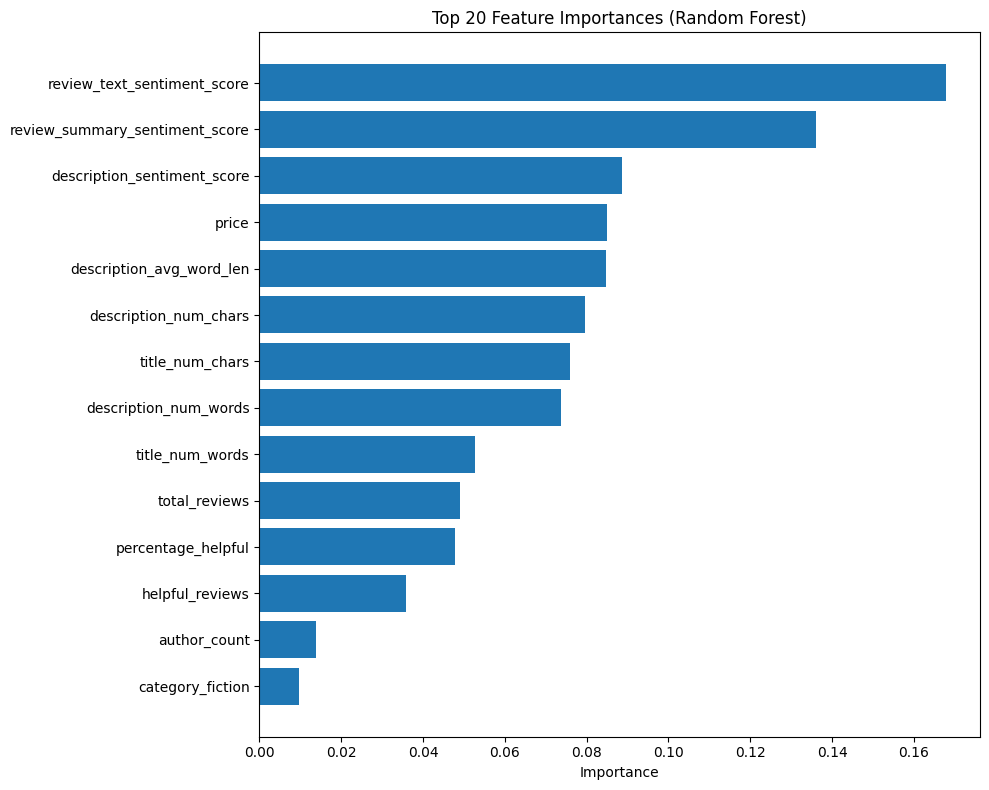

In [43]:
#feature importance

# Feature importance for RandomForest model

importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy viewing and sorting
import pandas as pd
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display the top 20 features
print(feat_imp_df.head(20))

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(feat_imp_df['feature'][:20][::-1], feat_imp_df['importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()








In [ ]:
#hyperparameters tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# If you want to use the best estimator:
best_rf_model = grid_search.best_estimator_

#Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
#Best cross-validation score:  0.7363811710075728


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2

In [31]:
test_df_raw = pd.read_csv('data/books_raw_test.csv')
test_df_raw

test_df = preprocess_books(test_df_raw)

test_df.head(15)

test_df.isna().sum()






No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


price                             0
title_num_chars                   0
title_num_words                   0
total_reviews                     0
helpful_reviews                   0
percentage_helpful                0
category_fiction                  0
author_count                      0
review_summary_sentiment_score    0
review_text_sentiment_score       0
description_sentiment_score       0
description_avg_word_len          0
description_num_words             0
description_num_chars             0
target                            0
dtype: int64

In [34]:
test_df_raw.head(1)

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity
0,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular


In [33]:
test_df.head(15)

,price,title_num_chars,title_num_words,total_reviews,helpful_reviews,percentage_helpful,category_fiction,author_count,review_summary_sentiment_score,review_text_sentiment_score,description_sentiment_score,description_avg_word_len,description_num_words,description_num_chars,target
0,9.35,93,15,0,0,0.00,0,1,1.00,1.00,1.00,4.78,74,427,0
1,32.50,70,11,20,18,0.90,0,2,1.00,1.00,1.00,4.85,13,75,0
2,10.98,66,14,12,9,0.75,0,1,0.95,0.99,1.00,5.87,31,212,0
3,12.95,14,2,6,6,1.00,0,1,1.00,0.99,1.00,4.83,12,69,0
4,14.96,173,26,0,0,0.00,0,1,0.77,1.00,1.00,5.20,368,2280,0
5,24.15,53,8,3,0,0.00,0,1,1.00,0.94,0.98,5.79,266,1804,0
6,18.95,37,6,3,2,0.67,0,1,0.97,1.00,1.00,5.12,32,195,0
7,15.00,22,3,3,2,0.67,1,1,0.99,0.94,1.00,5.07,268,1625,0
8,14.95,57,9,10,3,0.30,0,1,1.00,1.00,1.00,5.82,11,74,0
9,38.89,67,14,2,1,0.50,0,1,0.89,0.99,1.00,5.04,430,2598,0


In [37]:
target = test_df['target']

#create a dataset that does not include the target column but just for the first row
test_df_no_target = test_df.drop(columns=['target'])
print(rf_model.predict(test_df_no_target.head(1)))

[1]


In [ ]:
print(test_df_raw.head(1))

test_df = preprocess_books(test_df_raw.head(1))
test_df.head



